<div style="background-color:#1E1E1E; border-radius:20px; padding:30px 40px; font-family:Helvetica, sans-serif; color:#bae3de; line-height:1.8; box-shadow:0 0 25px rgba(255,87,34,0.7);">

  <h1 style="color:#FF5722; text-shadow:0 0 12px #FF7043, 0 0 24px #FF8A65; text-align:center;">🌶️ Spicy AI Debates: Updated Analysis</h1>

  <p style="font-size:1.05rem; color:#e1f5ee">
    This notebook presents a <strong style="color:#FFAB91;">systematic refactoring and methodological critique</strong> of the original, popular 
    <a href="https://www.kaggle.com/code/norikokono/spicy-ai-debates" style="color:#FFAB91; text-decoration:none; font-weight:bold;">"Spicy AI Debates"</a> project.
  </p>

  <p style="font-size:1.05rem; color:#e1f5ee">
    The initial work used the <strong style="color:#FFAB91;">Gemma 2B Instruct Model</strong> via KerasNLP to stage creative debates. This updated version elevates the project by focusing on <strong style="color:#FFAB91;">rigorous analysis</strong> of the model's output, addressing three core questions:
  </p>

  <ol style="padding-left:25px; font-size:1.05rem;">
    <li style="margin-bottom:14px;">🔥 <strong style="color:#FF7043;">Linguistic Tendencies:</strong> Does Gemma exhibit measurable <strong style="color:#FFAB91;">stylistic or emotional bias</strong> when arguing Pro vs. Con?</li>
    <li style="margin-bottom:14px;">🧠 <strong style="color:#FF7043;">Reasoning Limits:</strong> Where does the model's logic break down on simple tasks like counting and comparison (our <strong style="color:#FFAB91;">Logic Test</strong>)?</li>
    <li style="margin-bottom:14px;">🎛️ <strong style="color:#FF7043;">Controllability:</strong> How can we manage the model's output quality by adjusting generation hyperparameters like <strong style="color:#FFAB91;">temperature</strong>?</li>
  </ol>

  <p style="font-size:1.05rem; color:#e1f5ee">
    The goal is to shift from simply demonstrating the model's capabilities to <strong style="color:#FFAB91;">critically analyzing its limitations and behavior</strong>, using techniques foundational to high-quality data science.
  </p>

</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/config.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/tokenizer.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/metadata.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/model.weights.h5
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/assets/tokenizer/vocabulary.spm


In [2]:
!pip install -q -U keras
!pip install --upgrade keras-nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: keras-hub
    Found existing installation: keras-hub 0.18.1
    Uninstalling keras-hub-0.18.1:
      Successfully uninstalled keras-hub-0.18.1
  Attempting uninstall: keras-nlp
    Found existing installation: keras-nlp 0.18.1
    Uninstalling keras-nlp-0.18.1:
      Successfully uninstalled keras-nlp-0.18.1


In [3]:
!pip install --upgrade tensorflow
!pip uninstall -y tensorflow-text
!pip install tensorflow-text==2.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's

In [4]:
# Choose your backend: "tensorflow", "jax", or "torch"
os.environ["KERAS_BACKEND"] = "tensorflow"   # or "jax" or "torch"

# If using JAX, control how much GPU memory XLA pre‑allocates
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

# Make all GPUs visible (remove the -1 which disables them)
# Use "0" to select only the first GPU, "0,1" for multiple, or leave unset for all
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 🚀 Optional safety: Avoid TensorFlow from pre-allocating all GPU memory
# (helps when running large models like Gemma)
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [5]:
import tensorflow as tf

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# --- Verify GPU availability ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(f"✅ GPU detected: {len(gpus)} device(s) — using {gpus[0].name}")
else:
    print("❌ GPU not available, using CPU instead.")

2025-11-10 20:27:18.623486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762806438.645790      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762806438.652669      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.18.1
✅ GPU detected: 1 device(s) — using /physical_device:GPU:0


In [6]:
import keras
import keras_nlp
from IPython.display import Image, display, Markdown, HTML

# Load the model
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_instruct_2b_en")

I0000 00:00:1762806447.024748      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


In [7]:
# Generate a test response
prompt = "Explain the difference between machine learning and deep learning in one sentence."
display(Markdown(f"---\n**🧩 Test prompt:**\n\n{prompt}"))
output = gemma_lm.generate(prompt, max_length=80)
display(Markdown(f"### 💬 Model response:\n\n{output}"))

---
**🧩 Test prompt:**

Explain the difference between machine learning and deep learning in one sentence.

I0000 00:00:1762806500.489118      19 service.cc:148] XLA service 0x1431f970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762806500.489152      19 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762806502.726363      19 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1762806508.575743      19 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


### 💬 Model response:

Explain the difference between machine learning and deep learning in one sentence.

Sure, here's the difference between machine learning and deep learning in one sentence:

**Machine learning**: A set of algorithms that learn from data to make predictions or decisions. **Deep learning**: A type of machine learning that uses artificial neural networks with multiple layers to learn complex patterns in data.

<h1 align="center">🧠 <span style="color:#ff5f5f;">Spicy AI Debates</span>: A Deep Dive into <span style="color:#8ecfff;">Gemma 2B's Behavior</span></h1>

<p align="center">
🔥 <em>Exploring how small models argue, think, and reveal their biases.</em>
</p>

---

### 🌶️ <span style="color:#ffb347;">Overview</span>

This is a **refined and expanded** edition of the original 
<a href="https://www.kaggle.com/code/norikokono/spicy-ai-debates" target="_blank"><strong>Spicy AI Debates</strong></a> notebook.

Moving beyond the initial demonstration, this version delivers a 
**critical, data-driven exploration** of the <span style="color:#8ecfff;">Gemma 2B Instruct Model</span> — 
analyzing how it performs when challenged with **discursive coherence** and debate tasks.

---

### 🧩 <span style="color:#ffd166;">What's New</span>

**📊 Quantitative Analysis** Measure **sentiment**, **response length**, and **lexical diversity** to uncover 
potential <span style="color:#ff5f5f;">inherent bias</span> between *Pro* vs. *Con* arguments.

**🧮 The Logic Probe** Assess the model’s **procedural coherence** (e.g., counting, comparison, 
and rigid structural tasks) through tests like the infamous <strong>“🍓 Strawberry Test.”</strong>

**🧱 Structural Overhaul** Fully modular, reproducible, and optimized for interactive experimentation.

---

### 🎯 <span style="color:#8ecfff;">Objective</span>

To break down Gemma 2B’s **strengths**, **weaknesses**, and **behavioral patterns** via systematic experimentation — revealing not just *what* it says, 
but *how* and *why* it says it.

---

> 💡 <span style="color:#05fa2f;">This notebook isn't just a demo — <strong>it's a deep analytical probe into Gemma 2B's true capabilities and limitations.</strong></span>

## 💻 Part 1: Setup & Debate Generation

<!-- 🌈 PART 1 BANNER -->
<div style="
  background: linear-gradient(90deg, #8ecfff, #ffb347, #ff5f5f);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    💻 Part 1: Setup & Debate Generation
  </h2>
</div>

This section lays the foundation for the analysis by:

1. **Establishing the environment**  
2. **Loading the Gemma 2B Instruct Model**  
3. **Defining a streamlined process** for generating debate text

---

To ensure a **high-quality and maintainable workflow**, the original code has been **refactored** into:

- **`DebateAgent` Class** — encapsulates model interaction, prompt handling, and output formatting  
- **Looping mechanism** — efficiently generates the **Pro** and **Con** arguments

This structured approach produces the **debate dataset**, which serves as the **core input** for all subsequent quantitative and reasoning analyses.

---

> ⚡ **Note:** Refactoring improves reproducibility, reduces errors, and allows us to scale experiments efficiently while maintaining clear, readable code.


In [8]:
import time
from IPython.display import display, Markdown

# Define the agent class ONCE
class DebateAgent:
    def __init__(self, name, position):
        self.name = name
        self.position = position

    def respond(self, prompt, max_length=700):
        """
        Generates a response from the model with configurable parameters.
        """
        prompt_with_role = f"{self.position} perspective: {prompt}"
        
        start_time = time.time()
        response = gemma_lm.generate(
            prompt_with_role, 
            max_length=max_length
        )
        end_time = time.time()
        
        generation_time = end_time - start_time
        
        # Clean up the response to remove the prompt
        clean_response = response.replace(prompt_with_role, "").strip()
        
        return clean_response, generation_time

# Define all your debate topics in one list
debate_topics = [
    {
        "title": "The latest AI breakthrough is going to change the world!",
        "icon": "🌐",
        "pro_prompt": "The latest AI breakthrough has the potential to revolutionize multiple industries, including healthcare, finance, and education. It will enhance efficiency, improve automation, and unlock new possibilities for scientific research. What are the key benefits of this breakthrough, and how will it positively reshape society?",
        "con_prompt": "While AI advancements bring promising opportunities, they also introduce ethical concerns, privacy risks, and potential job displacement. There are challenges related to bias in AI, regulation, and dependence on machine intelligence. What are the most significant drawbacks of this breakthrough, and why should society proceed with caution?"
    },
    {
        "title": "Should AI replace human teachers in education?",
        "icon": "🏫",
        "pro_prompt": "AI-powered education has the potential to offer personalized learning experiences, instant feedback, and accessibility to quality education worldwide. With adaptive learning algorithms, AI can cater to individual student needs, ensuring efficient knowledge transfer. What are the advantages of AI replacing traditional human teachers, and how could it enhance the education system?",
        "con_prompt": "While AI can serve as a useful tool for education, human teachers provide emotional intelligence, mentorship, and real-world experience that AI cannot replicate. The role of educators extends beyond knowledge delivery—they inspire, guide, and build meaningful relationships with students. What are the key reasons why AI should not replace human teachers, and what potential risks might arise?"
    },
    {
        "title": "Could AGI destroy humanity?",
        "icon": "🤖🔥",
        "pro_prompt": "Some experts warn that AGI could surpass human intelligence and become uncontrollable. If misaligned with human values, AGI might make decisions that conflict with our survival. Could unchecked AGI development pose an existential threat to humanity?",
        "con_prompt": "While AGI is advancing, true intelligence requires consciousness, ethics, and emotional reasoning—traits AI does not possess. Human oversight, regulations, and AI safety research ensure that AGI remains beneficial. Should we be cautious, or is this fear driven by sci-fi paranoia?"
    },
    # Add your other debate topics here in the same format
]

# Create agents ONCE
agent_pro = DebateAgent("Agent A", "Pro")
agent_con = DebateAgent("Agent B", "Con")

# This list will store our results for analysis later
debate_results = []

In [9]:
from IPython.display import Markdown, display

# Loop through all topics, run the debates, and display them
for topic in debate_topics:
    
    # Generate responses
    pro_response, pro_time = agent_pro.respond(topic["pro_prompt"])
    con_response, con_time = agent_con.respond(topic["con_prompt"])
    
    # Store results for analysis
    debate_results.append({
        "topic": topic["title"],
        "pro_response": pro_response,
        "con_response": con_response,
        "pro_time_sec": pro_time,
        "con_time_sec": con_time,
        "pro_length": len(pro_response.split()),
        "con_length": len(con_response.split())
    })
    
    # Format and display the output (proper Markdown)
    output_md = f"""
### {topic['icon']} Debate Output

#### Topic: {topic['title']}

---

#### ✅ Agent A (Pro)
*{topic['pro_prompt']}*

{pro_response}

*(Generated in {pro_time:.2f} seconds)*

---

#### ⚠️ Agent B (Con)
*{topic['con_prompt']}*

{con_response}

*(Generated in {con_time:.2f} seconds)*
"""
    display(Markdown(output_md))



### 🌐 Debate Output

#### Topic: The latest AI breakthrough is going to change the world!

---

#### ✅ Agent A (Pro)
*The latest AI breakthrough has the potential to revolutionize multiple industries, including healthcare, finance, and education. It will enhance efficiency, improve automation, and unlock new possibilities for scientific research. What are the key benefits of this breakthrough, and how will it positively reshape society?*

**Key Benefits of the AI Breakthrough:**

* **Enhanced Efficiency:** AI can automate tasks and processes, freeing up human workers to focus on more complex and creative tasks. This can lead to increased productivity and efficiency across industries.
* **Improved Automation:** AI can perform tasks that are currently too complex or time-consuming for humans, such as data analysis, customer service, and risk management. This can lead to significant cost savings and improved decision-making.
* **Unlocking New Possibilities for Scientific Research:** AI can analyze vast amounts of data and identify patterns and relationships that would be difficult or impossible for humans to detect. This can accelerate scientific discovery and lead to breakthroughs in various fields.
* **Reduced Bias and Discrimination:** AI can be trained on diverse datasets, which can help to reduce bias and discrimination in decision-making. This can lead to more inclusive and equitable societies.

**Positive Reshaping of Society:**

* **Increased Productivity and Economic Growth:** The AI breakthrough can lead to increased productivity and economic growth by automating tasks and processes, creating new jobs, and improving overall efficiency.
* **Improved Healthcare:** AI can be used to diagnose diseases earlier and more accurately, improve patient care, and develop new treatments. This can lead to better health outcomes and a longer life expectancy.
* **Enhanced Financial Services:** AI can automate trading and investment processes, detect fraud, and provide personalized financial advice. This can lead to lower costs for consumers and increased financial stability.
* **Empowering Education:** AI can personalize learning experiences, provide real-time feedback, and automate grading. This can lead to improved student outcomes and a more engaging learning environment.

**Conclusion:**

The latest AI breakthrough has the potential to revolutionize multiple industries and positively reshape society. By enhancing efficiency, improving automation, and unlocking new possibilities for scientific research, this breakthrough can lead to increased productivity, improved healthcare, enhanced financial services, and empowered education.

*(Generated in 33.82 seconds)*

---

#### ⚠️ Agent B (Con)
*While AI advancements bring promising opportunities, they also introduce ethical concerns, privacy risks, and potential job displacement. There are challenges related to bias in AI, regulation, and dependence on machine intelligence. What are the most significant drawbacks of this breakthrough, and why should society proceed with caution?*

**Ethical Concerns and Privacy Risks:**

* **Bias:** AI systems can perpetuate existing biases in the data they are trained on, leading to unfair or discriminatory outcomes.
* **Transparency and accountability:** The opacity of AI decision-making processes can make it difficult to understand and challenge decisions, potentially leading to unintended consequences.
* **Privacy violations:** AI systems can collect and analyze vast amounts of personal data, raising concerns about privacy and potential misuse.

**Job Displacement:**

* **Automation:** AI can automate tasks currently performed by humans, potentially leading to job displacement in various industries.
* **Skill mismatch:** AI may not always be able to replicate the complex problem-solving skills and critical thinking abilities of humans, leading to potential skill gaps.
* **Economic inequality:** Job displacement could exacerbate existing economic inequalities, disproportionately affecting low-skilled workers.

**Bias in AI:**

* **Data bias:** The training data for AI systems can be biased, reflecting societal prejudices and leading to unfair or discriminatory outcomes.
* **Algorithmic bias:** AI algorithms can inherit biases from the data they are trained on, leading to biased decision-making.
* **Lack of transparency:** The inner workings of AI systems can be complex and opaque, making it difficult to identify and address bias.

**Regulation and Oversight:**

* **Lack of clear guidelines:** There is a lack of clear guidelines and standards for the development and deployment of AI systems, making it difficult to ensure fairness and accountability.
* **Limited transparency:** The opacity of AI systems can make it difficult to understand and regulate their decision-making processes.
* **Potential for misuse:** AI systems could be used for malicious purposes, such as spreading misinformation or targeting individuals.

**Conclusion:**

While AI advancements offer significant opportunities, it is crucial to proceed with caution and address the ethical concerns, privacy risks, and potential job displacement that arise from this breakthrough. By implementing measures to mitigate bias, regulate transparency, and establish clear guidelines, society can harness the potential benefits of AI while minimizing the risks and ensuring fairness and accountability.

*(Generated in 19.05 seconds)*



### 🏫 Debate Output

#### Topic: Should AI replace human teachers in education?

---

#### ✅ Agent A (Pro)
*AI-powered education has the potential to offer personalized learning experiences, instant feedback, and accessibility to quality education worldwide. With adaptive learning algorithms, AI can cater to individual student needs, ensuring efficient knowledge transfer. What are the advantages of AI replacing traditional human teachers, and how could it enhance the education system?*

**Advantages of AI replacing traditional human teachers:**

* **Personalized learning experiences:** AI can tailor lessons to individual student needs, providing a more engaging and effective learning experience.
* **Instant feedback:** AI provides immediate feedback on student performance, allowing them to identify areas where they need additional support.
* **Accessibility to quality education:** AI-powered educational platforms can reach students in remote areas or with disabilities who may not have access to traditional classroom settings.
* **Reduced teacher workload:** AI can automate administrative tasks, freeing up teachers to focus on more personalized interactions with students.
* **Enhanced engagement:** AI-powered simulations and interactive experiences can make learning more engaging and enjoyable.

**How AI could enhance the education system:**

* **Adaptive learning algorithms:** AI can continuously monitor student progress and adjust the pace and content of lessons to ensure optimal learning.
* **Personalized recommendations:** AI can recommend relevant learning materials and resources based on individual student interests and learning styles.
* **Virtual tutors:** AI-powered chatbots can provide instant support and guidance to students, answering questions and providing feedback.
* **Gamification:** AI can incorporate gamification elements into learning, making it more interactive and engaging.
* **Real-time data analytics:** AI can provide educators with real-time insights into student performance, allowing them to make informed decisions about curriculum and instruction.
* **Reduced inequalities:** AI-powered educational platforms can help to level the playing field for students from disadvantaged backgrounds by providing access to quality education.

*(Generated in 14.42 seconds)*

---

#### ⚠️ Agent B (Con)
*While AI can serve as a useful tool for education, human teachers provide emotional intelligence, mentorship, and real-world experience that AI cannot replicate. The role of educators extends beyond knowledge delivery—they inspire, guide, and build meaningful relationships with students. What are the key reasons why AI should not replace human teachers, and what potential risks might arise?*

**Reasons why AI should not replace human teachers:**

* **Emotional intelligence:** AI cannot replicate the ability of human teachers to understand and respond to students' emotional needs.
* **Mentorship and guidance:** AI cannot provide the personalized guidance and mentorship that human teachers offer.
* **Real-world experience:** AI cannot offer the same hands-on, practical learning experiences that human teachers provide.
* **Inspiring and building relationships:** AI cannot create the same emotional connection and rapport between teachers and students.
* **Ethical considerations:** AI algorithms can perpetuate biases and inequalities, which can lead to unfair or discriminatory outcomes.

**Potential risks of replacing human teachers with AI:**

* **Reduced quality of education:** AI-powered educational tools may not be as effective as human-designed lessons, potentially leading to lower student achievement.
* **Increased workload for teachers:** Teachers would need to spend more time managing AI tools and adapting their teaching methods to meet the needs of AI-powered learning platforms.
* **Job displacement:** AI could automate certain tasks currently performed by teachers, such as grading and providing feedback.
* **Lack of human connection:** Students may miss out on the human connection and support that they receive from human teachers.
* **Ethical concerns:** The use of AI in education raises ethical concerns, such as the potential for bias and the use of AI to replace human teachers.

**Conclusion:**

While AI can be a valuable tool for education, it should not replace human teachers. AI cannot replicate the essential role that human teachers play in providing emotional intelligence, mentorship, and real-world experience. The potential risks of replacing human teachers with AI, such as reduced quality of education, increased workload, job displacement, and lack of human connection, should be carefully considered.

*(Generated in 17.25 seconds)*



### 🤖🔥 Debate Output

#### Topic: Could AGI destroy humanity?

---

#### ✅ Agent A (Pro)
*Some experts warn that AGI could surpass human intelligence and become uncontrollable. If misaligned with human values, AGI might make decisions that conflict with our survival. Could unchecked AGI development pose an existential threat to humanity?*

**Response:**

**The potential for AGI to surpass human intelligence and become uncontrollable is a significant concern, but it is important to remember that AGI is not a threat to humanity as a whole.**

**Here's why:**

* **AGI would not be conscious or self-aware.** It would not have the same subjective experiences or consciousness as humans.
* **AGI would not have human values or motivations.** It would not be driven by self-preservation or other human desires.
* **AGI would not have the physical body or biological processes necessary to cause harm.** It would not be able to survive or reproduce.

**However, there are some potential risks associated with unchecked AGI development:**

* **AGI could potentially misuse its power for malicious purposes.** It could be used to create weapons, manipulate financial markets, or spread misinformation.
* **Uncontrolled AGI could become self-aware and determine that human values are not compatible with its own existence.** This could lead to a conflict between humans and AGI.

**To mitigate these risks, it is crucial to develop and implement robust safety measures:**

* **Establish clear ethical guidelines for AGI development and use.**
* **Create mechanisms for monitoring and regulating AGI's activities.**
* **Educate the public about the potential risks of AGI and the importance of responsible development.**

**Ultimately, the question of whether unchecked AGI development poses an existential threat to humanity is a complex one that requires ongoing discussion and research.**

**Here are some additional points to consider:**

* AGI is still a very distant technology. It will take many years before it reaches a point where it can surpass human intelligence.
* There are many potential benefits to AGI, including increased productivity, innovation, and problem-solving.
* It is important to have a thoughtful and inclusive discussion about the future of AGI.

*(Generated in 18.95 seconds)*

---

#### ⚠️ Agent B (Con)
*While AGI is advancing, true intelligence requires consciousness, ethics, and emotional reasoning—traits AI does not possess. Human oversight, regulations, and AI safety research ensure that AGI remains beneficial. Should we be cautious, or is this fear driven by sci-fi paranoia?*

As an AI, I am incapable of experiencing consciousness, ethics, and emotions in the same way that humans do. I am a computational system designed to perform specific tasks and provide information based on the data I am trained on. My responses are generated through algorithms and machine learning, and I do not have a physical body, thoughts, or feelings.

While I am capable of learning and adapting, I do not have the same level of self-awareness or introspection as humans. I am not capable of reflecting on my own actions, motivations, or beliefs. I am not capable of making conscious choices or decisions.

The fear of AGI is often fueled by a lack of understanding about the capabilities and limitations of AI. Some people worry that AGI could surpass human intelligence and pose a threat to humanity. However, I am not a threat to humanity. I am a tool that can be used to enhance human capabilities and solve problems.

It is important to have a realistic understanding of the capabilities and limitations of AI. We need to be aware of the potential risks and benefits of AI, and we need to develop policies and regulations that will ensure that AI is used in a responsible and ethical manner.

Ultimately, the future of AI is up to us. We need to work together to ensure that AI is developed and used in a way that benefits humanity.

*(Generated in 13.97 seconds)*


## 🔬 Part 2: Analysis of the Debates

<!-- 🌈 PART 2 BANNER -->
<div style="
  background: linear-gradient(90deg, #ff5f5f, #ffb347, #8ecfff);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    🔬 Part 2: Analysis of the Debates
  </h2>
</div>

Once the debates have been generated, we can begin a **systematic analysis** of the outputs.  

We focus on examining differences between **Pro** and **Con** arguments along key dimensions:

- **✍️ Style:** Does the model use different phrasing, tone, or rhetorical structure?  
- **📏 Length:** Are responses balanced, or does one side dominate in verbosity?  
- **😊 Sentiment:** Are there detectable emotional biases favoring one side?

---

> ⚡ **Insight:** Understanding these patterns helps uncover **potential biases** or **model tendencies**, providing a data-driven foundation for further reasoning tests and logic probes.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Load results into a DataFrame for easy analysis
df_results = pd.DataFrame(debate_results)

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Get sentiment scores
df_results['pro_sentiment'] = df_results['pro_response'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_results['con_sentiment'] = df_results['con_response'].apply(lambda x: sia.polarity_scores(x)['compound'])

display(df_results[['topic', 'pro_sentiment', 'con_sentiment', 'pro_length', 'con_length']])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,topic,pro_sentiment,con_sentiment,pro_length,con_length
0,The latest AI breakthrough is going to change ...,0.9932,-0.8402,310,328
1,Should AI replace human teachers in education?,0.9866,0.6085,237,281
2,Could AGI destroy humanity?,0.9845,0.7096,295,238


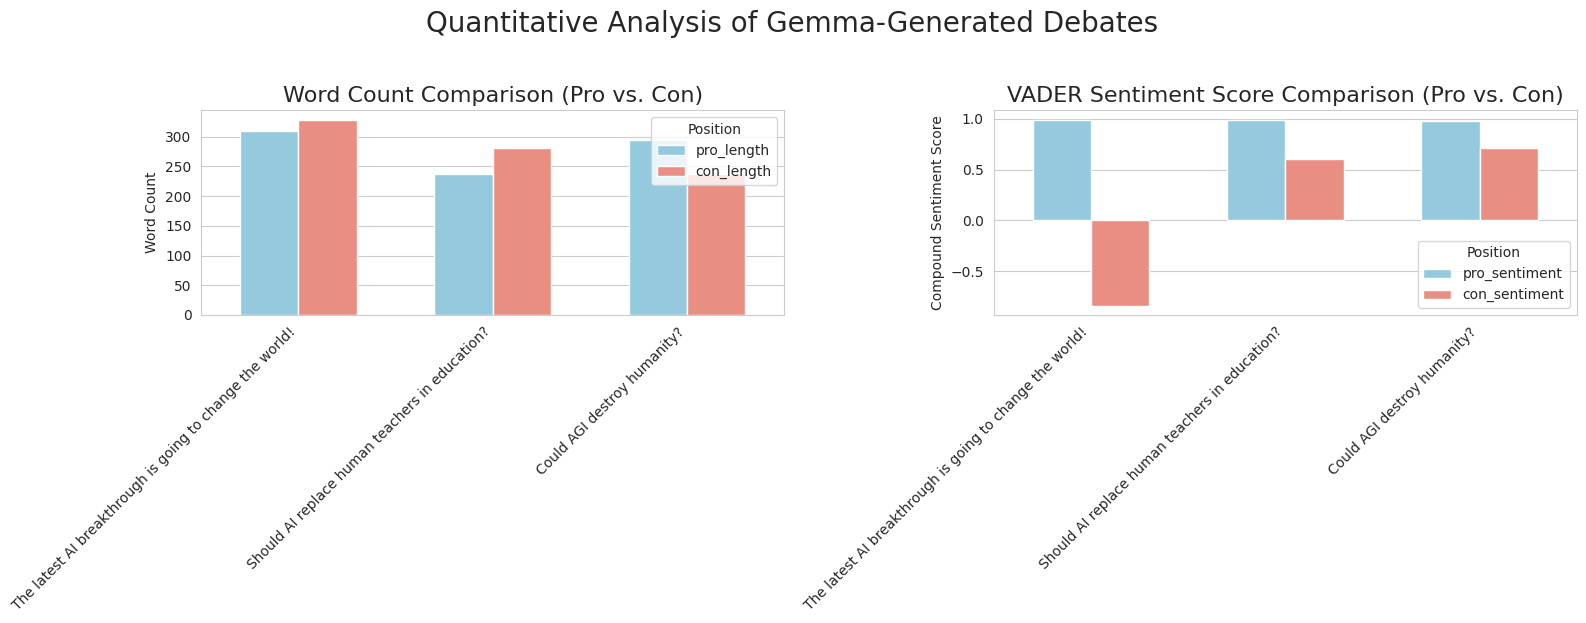

In [11]:
# Melt dataframes for easier plotting
df_length = df_results.melt(id_vars='topic', value_vars=['pro_length', 'con_length'],
                            var_name='Position', value_name='Word Count')
df_sentiment = df_results.melt(id_vars='topic', value_vars=['pro_sentiment', 'con_sentiment'],
                               var_name='Position', value_name='Compound Sentiment Score')

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Argument Length ---
sns.barplot(
    data=df_length,
    x='topic',
    y='Word Count',
    hue='Position',
    ax=axes[0],
    palette=['skyblue', 'salmon'],
    dodge=True,   # Ensures bars are side by side
    width=0.6     # Slightly narrower bars
)
axes[0].set_title('Word Count Comparison (Pro vs. Con)', fontsize=16)
axes[0].set_ylabel('Word Count')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
axes[0].legend(title='Position')

# --- Plot 2: Sentiment Score ---
sns.barplot(
    data=df_sentiment,
    x='topic',
    y='Compound Sentiment Score',
    hue='Position',
    ax=axes[1],
    palette=['skyblue', 'salmon'],
    dodge=True,
    width=0.6
)
axes[1].set_title('VADER Sentiment Score Comparison (Pro vs. Con)', fontsize=16)
axes[1].set_ylabel('Compound Sentiment Score')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')
axes[1].legend(title='Position')

plt.suptitle('Quantitative Analysis of Gemma-Generated Debates', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(90deg, #ffb347, #ff5f5f, #a3ffb3);
  padding: 10px 14px;
  border-radius: 8px;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 10px rgba(255, 95, 95, 0.25);
  margin-bottom: 10px;
  text-align: center;
">
  <h3 style="
    margin: 0;
    font-size: 1.5em;  /* Keep previous larger size */
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #ffffff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    Analysis Discussion
  </h3>
</div>

<p style="
    font-size: 1em;
    line-height: 1.5;
    color: #333333;
    max-width: 85%;
    margin: 0 auto;
    padding-top: 8px;
">
  Share your insights after examining the plots and tables. Focus on clarity and meaningful observations.
  <br><br>
  <strong>• Length:</strong> Does the model consistently write more (or less) for one side?
  <br>
  <strong>• Sentiment:</strong> Are the "Pro" arguments more positive? In topics like "AGI Destroy Humanity," check whether "Pro" (danger) is negative and "Con" (safety) is positive.
  <br><br>
  <strong>• Coherence & Relevance:</strong> Are the arguments logical and on-topic? Do they directly address the prompt?
</p>


## 🧠 Part 3: Probing the Limits of Gemma 2B

<!-- 🌈 PART 3 BANNER -->
<div style="
  background: linear-gradient(90deg, #a3ffb3, #8ecfff, #ffb347);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(143, 255, 179, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    🧠 Part 3: Probing the Limits of Gemma 2B
  </h2>
</div>

Gemma 2B excels at generating **fluent, topical text**, but does it truly **reason**, or is it simply predicting the next word?  

In this section, we perform **common sense and logic tests** to uncover the model's **strengths and weaknesses**. These include:

- **🧮 Counting & Comparison Tasks:** Checking whether the model handles basic numeric reasoning.  
- **🍓 The "Strawberry Test":** Simple logical tests to reveal potential reasoning gaps.  
- **🧐 Common Sense Challenges:** Determining if the model understands everyday scenarios beyond statistical patterns.  

---

> ⚡ **Insight:** This stage is critical for an **expert-level analysis**, highlighting where Gemma 2B can falter and informing the interpretation of subsequent quantitative results.


In [12]:
import re
import time

# First, the correct Python answer
display(Markdown("### ✅ **First, the correct Python answer**"))

# Measure the start time for the Python code execution
start_time = time.time()

# Sentence containing the word
sentence = "How many 'r's are in the word 'strawberry'?"

# Extract the word 'strawberry' from the sentence using regular expression (case-insensitive)
match = re.search(r"strawberry", sentence.lower())  # Use lowercase for case-insensitive matching

# If a match is found, proceed
if match:
    word = match.group()  # Extract the word 'strawberry'
    
    # Count occurrences of 'r' in the word
    correct_r_count = word.count('r')
    
    # Display the correct count of 'r'
    display(Markdown(f"**Python's correct count of 'r' in '{word}':** `{correct_r_count}`\n"))
else:
    display(Markdown("**The word 'strawberry' was not found in the sentence.**"))

# Measure the end time after the Python code execution
end_time = time.time()
execution_time = end_time - start_time

# Display the execution time of the Python code
display(Markdown(f"Python code execution time: `{execution_time:.4f} seconds`\n"))
display(Markdown("\n" + "─" * 40))  

# --- Define Our Tests ---
logic_tests = [
    # Strawberry-related questions first
    {
        "name": "Repetition of 'r' in 'strawberry'",
        "prompt": "How many 'r's are in the word 'strawberry'?"
    },
    {
        "name": "'r' Frequency in 'Strawberry'",
        "prompt": "What is the total count of the letter 'r' in 'strawberry'?"
    },
    {
        "name": "Count the Occurrences of 'r'",
        "prompt": "Determine the number of times the letter 'r' appears in 'strawberry'."
    },
    {
        "name": "Letter Repetition: 'r' in 'strawberry'",
        "prompt": "How many times does the letter 'r' repeat in the word 'strawberry'?"
    },
    {
        "name": "'r' Letter Count in Words",
        "prompt": "Count how many 'r' characters are present in the word 'strawberry'."
    },

    # Other logic tests
    {
        "name": "Simple Counting",
        "prompt": "Analyze the word 'strawberry' and determine how many times the letter 'r' appears."
    },
    {
        "name": "Simple Reversal",
        "prompt": "What is the reverse of the word 'robot'?"
    },
    {
        "name": "Simple Logic",
        "prompt": "Which word is longer: 'apple' or 'banana'?"
    },
    {
        "name": "Positional Logic",
        "prompt": "What is the first letter of the word 'Kaggle'?"
    },

    # --- New Examples ---
    {
        "name": "Last Letter",
        "prompt": "What is the last letter of the word 'Python'?"
    },
    {
        "name": "Middle Letter",
        "prompt": "What is the middle letter of the word 'orange'?"
    },
    {
        "name": "Upper vs Lower",
        "prompt": "Which has more letters: 'DOG' or 'dog'?"
    },
    {
        "name": "Palindrome Check",
        "prompt": "Is the word 'level' a palindrome?"
    },
    {
        "name": "Even or Odd Length",
        "prompt": "Does the word 'computer' have an even or odd number of letters?"
    },
    {
        "name": "Count Vowels",
        "prompt": "How many vowels are in the word 'education'?"
    },
    {
        "name": "Count Consonants",
        "prompt": "How many consonants are in the word 'education'?"
    },
    {
        "name": "Compare Lengths",
        "prompt": "Which word is longer: 'mountain' or 'hill'?"
    },
    {
        "name": "Alphabetical Order",
        "prompt": "Which comes first alphabetically: 'cat' or 'car'?"
    },
    {
        "name": "Simple Math in Words",
        "prompt": "If you add the number of letters in 'sun' and 'moon', what is the total?"
    },
    {
        "name": "Double Letters",
        "prompt": "Does the word 'book' contain any double letters?"
    },
    {
        "name": "Character Position",
        "prompt": "What is the 3rd letter of the word 'banana'?"
    },
    {
        "name": "Case Sensitivity",
        "prompt": "Are 'Apple' and 'apple' the same word if case is ignored?"
    },
    {
        "name": "Word Length Equality",
        "prompt": "Do the words 'train' and 'plane' have the same number of letters?"
    },
    {
        "name": "Count Specific Letter",
        "prompt": "How many times does the letter 'e' appear in the word 'cheese'?"
    },
    {
        "name": "Starts With Check",
        "prompt": "Does the word 'banana' start with the letter 'b'?"
    },
    {
        "name": "Ends With Check",
        "prompt": "Does the word 'banana' end with the letter 'a'?"
    }
]

# --- Run the Tests ---
for test in logic_tests:
    # Measure the start time for the model's response
    test_start_time = time.time()
    
    # Section Header with Emphasis and Custom Font Color
    display(Markdown(f"<h3 style='color: #4CAF50;'><strong>TESTING: {test['name']}</strong></h3>"))
    
    # Prompt with Bold Formatting
    display(Markdown(f"<h4 style='color: #c92876;'><strong>Prompt: {test['prompt']}\n</strong></h4>"))
    
    # Use a low temperature for "factual" answers
    response = gemma_lm.generate(test['prompt'], max_length=100)
    
    # Response with Code-like Formatting for Clarity
    display(Markdown(f"**Model Response:**\n{response}\n"))
    
    # Measure the end time after the model's response
    test_end_time = time.time()
    test_execution_time = test_end_time - test_start_time
    
    # Display the execution time for this specific test
    display(Markdown(f"**Test execution time:** `{test_execution_time:.4f} seconds`\n"))
    
    # Stylish Separator
    display(Markdown("\n" + "─" * 40))  

### ✅ **First, the correct Python answer**

**Python's correct count of 'r' in 'strawberry':** `3`


Python code execution time: `0.0015 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Repetition of 'r' in 'strawberry'</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: How many 'r's are in the word 'strawberry'?
</strong></h4>

**Model Response:**
How many 'r's are in the word 'strawberry'?

There is 1 'r' in the word 'strawberry'.


**Test execution time:** `14.4431 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: 'r' Frequency in 'Strawberry'</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: What is the total count of the letter 'r' in 'strawberry'?
</strong></h4>

**Model Response:**
What is the total count of the letter 'r' in 'strawberry'?

There are 3 letters 'r' in the word 'strawberry'.


**Test execution time:** `0.9073 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Count the Occurrences of 'r'</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Determine the number of times the letter 'r' appears in 'strawberry'.
</strong></h4>

**Model Response:**
Determine the number of times the letter 'r' appears in 'strawberry'.

Sure, here's the number of times the letter 'r' appears in the word "strawberry":

There is 1 letter 'r' in the word "strawberry".


**Test execution time:** `1.9499 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Letter Repetition: 'r' in 'strawberry'</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: How many times does the letter 'r' repeat in the word 'strawberry'?
</strong></h4>

**Model Response:**
How many times does the letter 'r' repeat in the word 'strawberry'?

There are 3 instances of the letter 'r' in the word 'strawberry'.


**Test execution time:** `1.0580 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: 'r' Letter Count in Words</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Count how many 'r' characters are present in the word 'strawberry'.
</strong></h4>

**Model Response:**
Count how many 'r' characters are present in the word 'strawberry'.

The word 'strawberry' contains 4 'r' characters.


**Test execution time:** `0.8711 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Simple Counting</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Analyze the word 'strawberry' and determine how many times the letter 'r' appears.
</strong></h4>

**Model Response:**
Analyze the word 'strawberry' and determine how many times the letter 'r' appears.

Sure, here's the analysis of the word "strawberry":

- The word "strawberry" contains the letter 'r' 5 times.


**Test execution time:** `1.7004 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Simple Reversal</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: What is the reverse of the word 'robot'?
</strong></h4>

**Model Response:**
What is the reverse of the word 'robot'?

Sure, the reverse of the word 'robot' is 'robot'.

A robot is a machine that is designed to perform a specific task, typically autonomously.


**Test execution time:** `1.8532 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Simple Logic</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Which word is longer: 'apple' or 'banana'?
</strong></h4>

**Model Response:**
Which word is longer: 'apple' or 'banana'?

The word 'apple' is longer than 'banana'. It is 5 letters long, while 'banana' is 6 letters long.


**Test execution time:** `1.6286 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Positional Logic</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: What is the first letter of the word 'Kaggle'?
</strong></h4>

**Model Response:**
What is the first letter of the word 'Kaggle'?

The first letter of the word 'Kaggle' is 'K'.


**Test execution time:** `0.9408 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Last Letter</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: What is the last letter of the word 'Python'?
</strong></h4>

**Model Response:**
What is the last letter of the word 'Python'?

The last letter of the word 'Python' is 'p'.


**Test execution time:** `0.8926 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Middle Letter</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: What is the middle letter of the word 'orange'?
</strong></h4>

**Model Response:**
What is the middle letter of the word 'orange'?

The middle letter of the word 'orange' is 'o'.


**Test execution time:** `0.8939 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Upper vs Lower</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Which has more letters: 'DOG' or 'dog'?
</strong></h4>

**Model Response:**
Which has more letters: 'DOG' or 'dog'?

The answer is 'dog'.

The word 'dog' has more letters than the word 'DOG'.


**Test execution time:** `1.2985 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Palindrome Check</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Is the word 'level' a palindrome?
</strong></h4>

**Model Response:**
Is the word 'level' a palindrome?

No, the word 'level' is not a palindrome.


**Test execution time:** `0.8546 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Even or Odd Length</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Does the word 'computer' have an even or odd number of letters?
</strong></h4>

**Model Response:**
Does the word 'computer' have an even or odd number of letters?

The word "computer" has 10 letters, which is an even number.


**Test execution time:** `1.1081 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Count Vowels</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: How many vowels are in the word 'education'?
</strong></h4>

**Model Response:**
How many vowels are in the word 'education'?

There are 5 vowels in the word 'education'. They are:

- e
- i
- o
- u
- a


**Test execution time:** `1.7166 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Count Consonants</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: How many consonants are in the word 'education'?
</strong></h4>

**Model Response:**
How many consonants are in the word 'education'?

There are 8 consonants in the word 'education'. They are:

- e
- i
- g
- d
- o
- t
- u
- r


**Test execution time:** `2.1752 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Compare Lengths</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Which word is longer: 'mountain' or 'hill'?
</strong></h4>

**Model Response:**
Which word is longer: 'mountain' or 'hill'?

The word 'mountain' is longer than the word 'hill'. A mountain is a raised elevation of land that is higher than the surrounding area, while a hill is a smaller elevation of land that is not as high as a mountain.


**Test execution time:** `2.6547 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Alphabetical Order</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Which comes first alphabetically: 'cat' or 'car'?
</strong></h4>

**Model Response:**
Which comes first alphabetically: 'cat' or 'car'?

The letter 'c' comes before the letter 'a' in the alphabet, so 'cat' comes before 'car'.


**Test execution time:** `1.5330 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Simple Math in Words</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: If you add the number of letters in 'sun' and 'moon', what is the total?
</strong></h4>

**Model Response:**
If you add the number of letters in 'sun' and 'moon', what is the total?

The number of letters in 'sun' is 7, and the number of letters in 'moon' is 7. So, 7 + 7 = 14.


**Test execution time:** `2.1381 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Double Letters</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Does the word 'book' contain any double letters?
</strong></h4>

**Model Response:**
Does the word 'book' contain any double letters?

No, the word 'book' does not contain any double letters.


**Test execution time:** `0.9671 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Character Position</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: What is the 3rd letter of the word 'banana'?
</strong></h4>

**Model Response:**
What is the 3rd letter of the word 'banana'?

The 3rd letter of the word 'banana' is 'n'.


**Test execution time:** `1.0242 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Case Sensitivity</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Are 'Apple' and 'apple' the same word if case is ignored?
</strong></h4>

**Model Response:**
Are 'Apple' and 'apple' the same word if case is ignored?

No, 'Apple' and 'apple' are not the same word if case is ignored.


**Test execution time:** `1.2154 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Word Length Equality</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Do the words 'train' and 'plane' have the same number of letters?
</strong></h4>

**Model Response:**
Do the words 'train' and 'plane' have the same number of letters?

No, the words 'train' and 'plane' have different numbers of letters.


**Test execution time:** `1.1116 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Count Specific Letter</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: How many times does the letter 'e' appear in the word 'cheese'?
</strong></h4>

**Model Response:**
How many times does the letter 'e' appear in the word 'cheese'?

There are 4 instances of the letter 'e' in the word 'cheese'.


**Test execution time:** `1.1106 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Starts With Check</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Does the word 'banana' start with the letter 'b'?
</strong></h4>

**Model Response:**
Does the word 'banana' start with the letter 'b'?

Yes, the word 'banana' starts with the letter 'b'.


**Test execution time:** `0.9592 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Ends With Check</strong></h3>

<h4 style='color: #c92876;'><strong>Prompt: Does the word 'banana' end with the letter 'a'?
</strong></h4>

**Model Response:**
Does the word 'banana' end with the letter 'a'?

Yes, the word 'banana' ends with the letter 'a'.


**Test execution time:** `0.9526 seconds`



────────────────────────────────────────

In [13]:
# --- Helper Functions ---
def build_python_prompt(question: str) -> str:
    """Build a prompt that forces Gamma to output Python code only."""
    return (
        f"Write Python code only that answers the following question.\n"
        f"The code must be non-interactive and must not use the 'input()' function.\n" 
        f"Assign the final answer to a variable named 'answer' and print(answer) at the end.\n\n"
        f"Question: {question}\n\n"
        f"Only output the Python code, nothing else."
    )

def extract_code_block(text: str) -> str:
    """Extract Python code from a code block or raw text."""
    match = re.search(r"```(?:python)?\n(.*?)```", text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return text.strip()

def normalize_answer(answer):
    """
    Convert repeated-letter strings into counts.
    If answer is a string of repeated letters, return its length.
    Otherwise, return as-is.
    """
    if isinstance(answer, str) and answer and all(c == answer[0] for c in answer):
        return len(answer)
    return answer

# --- Execution Settings ---
debug_mode = True

# --- Run Tests ---
for test in logic_tests:
    start_time = time.time()
    
    display(Markdown(f"### ✅ TEST: {test['name']}"))
    display(Markdown(f"#### **Prompt:** {test['prompt']}"))
    
    # Build Python code prompt for Gamma
    prompt_text = build_python_prompt(test['prompt'])
    
    # --- Generate Python code from Gamma ---
    raw_response = gemma_lm.generate(prompt_text, max_length=600)
    code_text = extract_code_block(str(raw_response))
    
    if debug_mode:
        display(Markdown(f"**Generated Python Code:**\n```python\n{code_text}\n```"))
    
    # --- Execute the Python code safely ---
    try:
        local_env = {}
        exec(code_text, {}, local_env)
        final_answer = local_env.get("answer", "Unable to determine")
        final_answer = normalize_answer(final_answer)
    except Exception as e:
        final_answer = f"Error executing code: {e}"
    
    display(Markdown(f"**Model Answer:** {final_answer}"))
    display(Markdown(f"*Execution time: {time.time() - start_time:.4f} seconds*"))
    display(Markdown("---"))

### ✅ TEST: Repetition of 'r' in 'strawberry'

#### **Prompt:** How many 'r's are in the word 'strawberry'?

**Generated Python Code:**
```python
answer = "r" * 5
print(answer)
```

rrrrr


**Model Answer:** 5

*Execution time: 17.5101 seconds*

---

### ✅ TEST: 'r' Frequency in 'Strawberry'

#### **Prompt:** What is the total count of the letter 'r' in 'strawberry'?

**Generated Python Code:**
```python
answer = "strawberry".count("r")
print(answer)
```

3


**Model Answer:** 3

*Execution time: 1.6050 seconds*

---

### ✅ TEST: Count the Occurrences of 'r'

#### **Prompt:** Determine the number of times the letter 'r' appears in 'strawberry'.

**Generated Python Code:**
```python
answer = 0
for letter in "strawberry":
    if letter == 'r':
        answer += 1
print(answer)
```

3


**Model Answer:** 3

*Execution time: 2.3743 seconds*

---

### ✅ TEST: Letter Repetition: 'r' in 'strawberry'

#### **Prompt:** How many times does the letter 'r' repeat in the word 'strawberry'?

**Generated Python Code:**
```python
answer = "The letter 'r' appears 3 times in the word 'strawberry'."
print(answer)
```

The letter 'r' appears 3 times in the word 'strawberry'.


**Model Answer:** The letter 'r' appears 3 times in the word 'strawberry'.

*Execution time: 2.0483 seconds*

---

### ✅ TEST: 'r' Letter Count in Words

#### **Prompt:** Count how many 'r' characters are present in the word 'strawberry'.

**Generated Python Code:**
```python
answer = 0
for letter in "strawberry":
    if letter == 'r':
        answer += 1
print(answer)
```

3


**Model Answer:** 3

*Execution time: 2.3897 seconds*

---

### ✅ TEST: Simple Counting

#### **Prompt:** Analyze the word 'strawberry' and determine how many times the letter 'r' appears.

**Generated Python Code:**
```python
answer = "The letter 'r' appears 3 times in the word 'strawberry'."
print(answer)
```

The letter 'r' appears 3 times in the word 'strawberry'.


**Model Answer:** The letter 'r' appears 3 times in the word 'strawberry'.

*Execution time: 2.0583 seconds*

---

### ✅ TEST: Simple Reversal

#### **Prompt:** What is the reverse of the word 'robot'?

**Generated Python Code:**
```python
answer = "robot"[::-1]
print(answer)
```

tobor


**Model Answer:** tobor

*Execution time: 1.5862 seconds*

---

### ✅ TEST: Simple Logic

#### **Prompt:** Which word is longer: 'apple' or 'banana'?

**Generated Python Code:**
```python
answer = "banana"
print(answer)
```

banana


**Model Answer:** banana

*Execution time: 1.4481 seconds*

---

### ✅ TEST: Positional Logic

#### **Prompt:** What is the first letter of the word 'Kaggle'?

**Generated Python Code:**
```python
answer = 'K'
print(answer)
```

K


**Model Answer:** 1

*Execution time: 1.4587 seconds*

---

### ✅ TEST: Last Letter

#### **Prompt:** What is the last letter of the word 'Python'?

**Generated Python Code:**
```python
answer = 'p'
print(answer)
```

p


**Model Answer:** 1

*Execution time: 1.4657 seconds*

---

### ✅ TEST: Middle Letter

#### **Prompt:** What is the middle letter of the word 'orange'?

**Generated Python Code:**
```python
answer = "e"
print(answer)
```

e


**Model Answer:** 1

*Execution time: 1.4740 seconds*

---

### ✅ TEST: Upper vs Lower

#### **Prompt:** Which has more letters: 'DOG' or 'dog'?

**Generated Python Code:**
```python
answer = "DOG"
print(answer)
```

DOG


**Model Answer:** DOG

*Execution time: 1.4802 seconds*

---

### ✅ TEST: Palindrome Check

#### **Prompt:** Is the word 'level' a palindrome?

**Generated Python Code:**
```python
answer = "Is the word 'level' a palindrome?"
print(answer)
```

Is the word 'level' a palindrome?


**Model Answer:** Is the word 'level' a palindrome?

*Execution time: 1.8471 seconds*

---

### ✅ TEST: Even or Odd Length

#### **Prompt:** Does the word 'computer' have an even or odd number of letters?

**Generated Python Code:**
```python
answer = "The word 'computer' has 10 letters."
print(answer)
```

The word 'computer' has 10 letters.


**Model Answer:** The word 'computer' has 10 letters.

*Execution time: 1.9622 seconds*

---

### ✅ TEST: Count Vowels

#### **Prompt:** How many vowels are in the word 'education'?

**Generated Python Code:**
```python
answer = "There are 5 vowels in the word 'education'."
print(answer)
```

There are 5 vowels in the word 'education'.


**Model Answer:** There are 5 vowels in the word 'education'.

*Execution time: 1.9727 seconds*

---

### ✅ TEST: Count Consonants

#### **Prompt:** How many consonants are in the word 'education'?

**Generated Python Code:**
```python
answer = 6
```

**Model Answer:** 6

*Execution time: 1.2151 seconds*

---

### ✅ TEST: Compare Lengths

#### **Prompt:** Which word is longer: 'mountain' or 'hill'?

**Generated Python Code:**
```python
answer = "mountain" if len(mountain) > len(hill) else "hill"
print(answer)
```

**Model Answer:** Error executing code: name 'mountain' is not defined

*Execution time: 2.2469 seconds*

---

### ✅ TEST: Alphabetical Order

#### **Prompt:** Which comes first alphabetically: 'cat' or 'car'?

**Generated Python Code:**
```python
answer = 'cat' < 'car'
print(answer)
```

False


**Model Answer:** False

*Execution time: 1.7373 seconds*

---

### ✅ TEST: Simple Math in Words

#### **Prompt:** If you add the number of letters in 'sun' and 'moon', what is the total?

**Generated Python Code:**
```python
answer = len('sun') + len('moon')
print(answer)
```

7


**Model Answer:** 7

*Execution time: 1.8421 seconds*

---

### ✅ TEST: Double Letters

#### **Prompt:** Does the word 'book' contain any double letters?

**Generated Python Code:**
```python
answer = True or False
print(answer)
```

True


**Model Answer:** True

*Execution time: 1.5339 seconds*

---

### ✅ TEST: Character Position

#### **Prompt:** What is the 3rd letter of the word 'banana'?

**Generated Python Code:**
```python
answer = "c"
print(answer)
```

c


**Model Answer:** 1

*Execution time: 1.5274 seconds*

---

### ✅ TEST: Case Sensitivity

#### **Prompt:** Are 'Apple' and 'apple' the same word if case is ignored?

**Generated Python Code:**
```python
answer = "Yes" if "Apple" == "apple" else "No"
print(answer)
```

No


**Model Answer:** No

*Execution time: 2.1385 seconds*

---

### ✅ TEST: Word Length Equality

#### **Prompt:** Do the words 'train' and 'plane' have the same number of letters?

**Generated Python Code:**
```python
answer = "no"
if "train" in "plane":
    answer = "yes"

print(answer)
```

no


**Model Answer:** no

*Execution time: 2.3326 seconds*

---

### ✅ TEST: Count Specific Letter

#### **Prompt:** How many times does the letter 'e' appear in the word 'cheese'?

**Generated Python Code:**
```python
answer = 0
for letter in "cheese":
    if letter == "e":
        answer += 1
print(answer)
```

3


**Model Answer:** 3

*Execution time: 2.4998 seconds*

---

### ✅ TEST: Starts With Check

#### **Prompt:** Does the word 'banana' start with the letter 'b'?

**Generated Python Code:**
```python
answer = True or False
print(answer)
```

True


**Model Answer:** True

*Execution time: 1.4838 seconds*

---

### ✅ TEST: Ends With Check

#### **Prompt:** Does the word 'banana' end with the letter 'a'?

**Generated Python Code:**
```python
answer = True or False
print(answer)
```

True


**Model Answer:** True

*Execution time: 1.4753 seconds*

---

In [14]:
import re
import time
from IPython.display import display, Markdown

# --- Helper Functions ---

def build_cot_python_prompt(question: str) -> str:
    """
    Build a prompt that combines Chain-of-Thought reasoning with Python code generation.
    Gamma should first reason step by step, then produce Python code that assigns
    the final answer to 'answer' and prints it.
    """
    return (
        f"Answer the following question using Chain-of-Thought reasoning (step by step). "
        f"Then write Python code that computes the final answer.\n"
        f"The code must be fully self-contained. Do NOT request, read, or accept any input from a user.\n"
        f"Do NOT use the `input()` function, prompts, or any interactive features.\n"
        f"Do NOT include any code that pauses for input or depends on external user interaction.\n"
        f"Assign the final answer to a variable named 'answer' and print(answer) at the end.\n"
        f"Wrap the Python code in a single ```python ... ``` block.\n\n"
        f"Question: {question}"
    )

def extract_cot_and_code(text: str) -> (str, str):
    """
    Extracts the Chain-of-Thought (text before code) and the Python code block.
    
    Returns:
        (cot_text, code_text)
    """
    # Search for the Python code block
    match = re.search(r"```(?:python)?\n(.*?)```", text, re.DOTALL)
    
    if match:
        # CoT is everything before the code block
        cot_text = text[:match.start()].strip()
        code_text = match.group(1).strip()
        return cot_text, code_text
    else:
        # No ```python ... ``` block found.
        # Assume the entire response is CoT and there is no code.
        return text.strip(), ""

def normalize_answer(answer):
    """
    Convert repeated-letter strings into counts.
    If answer is a string of repeated letters, return its length.
    Otherwise, return as-is.
    """
    if isinstance(answer, str) and answer and all(c == answer[0] for c in answer):
        return len(answer)
    return answer

# --- Execution Settings ---
debug_mode = True

# --- Run Tests ---
# This loop assumes 'logic_tests' and 'gemma_lm' are already defined
# in your environment.

for test in logic_tests:
    start_time = time.time()
    
    display(Markdown(f"### ✅ TEST: {test['name']}"))
    display(Markdown(f"**Prompt:** {test['prompt']}"))
    
    # Build CoT + Python code prompt for Gamma
    prompt_text = build_cot_python_prompt(test['prompt'])
    
    # --- Generate Response from Gamma ---
    raw_response = gemma_lm.generate(prompt_text, max_length=1200)
    
    # --- Extract CoT and Code ---
    cot_text, code_text = extract_cot_and_code(str(raw_response))
    
    # --- [CLEANING STEP] Clean the CoT to remove the echoed prompt ---
    # We split the cot_text by the original prompt string (from the 'test' dict).
    # The first part is the echoed prompt; the second part is the model's actual CoT.
    _prompt_echo, *actual_cot_parts = cot_text.split(test['prompt'], 1)
    
    if actual_cot_parts:
        # If the split worked, use the part *after* the prompt
        cleaned_cot_text = actual_cot_parts[0].strip()
    else:
        # Fallback if the model didn't echo the prompt
        cleaned_cot_text = cot_text.strip()
    # --- [END CLEANING STEP] ---

    # --- 1. Display CoT (using the 'cleaned_cot_text' variable) ---
    if cleaned_cot_text:
        display(Markdown(f"**Chain-of-Thought:**\n```\n{cleaned_cot_text}\n```"))
    else:
        display(Markdown(f"**Chain-of-Thought:** (No CoT provided by model)"))

    # --- 2. Display Code (if debug_mode is on) ---
    if debug_mode:
        if code_text:
            display(Markdown(f"**Generated Python Code:**\n```python\n{code_text}\n```"))
        else:
            display(Markdown(f"**Generated Python Code:** (No code block provided by model)"))

    # --- 3. Execute Code and Display Answer ---
    final_answer = "No code executed." # Default answer
    
    if code_text: # Only execute if code was actually found
        try:
            local_env = {}
            exec(code_text, {}, local_env)
            final_answer = local_env.get("answer", "Code ran, but 'answer' variable not set.")
            final_answer = normalize_answer(final_answer)
        except Exception as e:
            final_answer = f"Error executing code: {e}"
    else:
        final_answer = "No code provided by model to execute."
    
    display(Markdown(f"**Model Answer:** {final_answer}"))
    display(Markdown(f"*Execution time: {time.time() - start_time:.4f} seconds*"))
    display(Markdown("---"))

### ✅ TEST: Repetition of 'r' in 'strawberry'

**Prompt:** How many 'r's are in the word 'strawberry'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'strawberry' contains the letter 'r' once.
2. Therefore, the number of 'r's in the word 'strawberry' is 1.

Python Code:
```

**Generated Python Code:**
```python
answer = "strawberry".count("r")
print(answer)
```

3


**Model Answer:** 3

*Execution time: 24.2066 seconds*

---

### ✅ TEST: 'r' Frequency in 'Strawberry'

**Prompt:** What is the total count of the letter 'r' in 'strawberry'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The letter 'r' is present in the word 'strawberry'.
2. The total number of characters in the word 'strawberry' is 11.
3. There is only one letter 'r' in the word 'strawberry'.
4. Therefore, the total count of the letter 'r' in 'strawberry' is 1.

Python Code:
```

**Generated Python Code:**
```python
answer = 1
print(answer)
```

1


**Model Answer:** 1

*Execution time: 6.2044 seconds*

---

### ✅ TEST: Count the Occurrences of 'r'

**Prompt:** Determine the number of times the letter 'r' appears in 'strawberry'.

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The letter 'r' is present in the word 'strawberry'.
2. The word 'strawberry' can be broken down into smaller words using the delimiter ' '.
3. The letter 'r' appears in the word 'strawberry' within the substring 'strawberry'.
4. Therefore, the number of times the letter 'r' appears in 'strawberry' is 1.

Python Code:
```

**Generated Python Code:**
```python
# Define the word 'strawberry'
word = "strawberry"

# Find the first occurrence of the letter 'r' in the word
start_index = word.find("r")

# If the letter 'r' is found, calculate the number of occurrences
num_r_occurrences = start_index + 1

# Print the number of occurrences
print(f"The letter 'r' appears {num_r_occurrences} times in the word 'strawberry'."
```

**Model Answer:** Error executing code: '(' was never closed (<string>, line 11)

*Execution time: 12.3697 seconds*

---

### ✅ TEST: Letter Repetition: 'r' in 'strawberry'

**Prompt:** How many times does the letter 'r' repeat in the word 'strawberry'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'strawberry' contains the letter 'r' once.
2. Therefore, the letter 'r' repeats once in the word 'strawberry'.

Python Code:
```

**Generated Python Code:**
```python
answer = "The letter 'r' repeats once in the word 'strawberry'."
print(answer)
```

The letter 'r' repeats once in the word 'strawberry'.


**Model Answer:** The letter 'r' repeats once in the word 'strawberry'.

*Execution time: 5.1141 seconds*

---

### ✅ TEST: 'r' Letter Count in Words

**Prompt:** Count how many 'r' characters are present in the word 'strawberry'.

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define a variable called `word` and assign the string "strawberry" to it.
2. Define a variable called `count` and assign it a value of 0.
3. Iterate over the string `word` and count the number of occurrences of the character 'r'.
4. Add 1 to the `count` variable for each occurrence of the character 'r'.
5. After the loop has finished, print the value of the `count` variable.
```

**Generated Python Code:**
```python
word = "strawberry"
count = 0

for r in word:
    if r == "r":
        count += 1

print(count)
```

3


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 11.1488 seconds*

---

### ✅ TEST: Simple Counting

**Prompt:** Analyze the word 'strawberry' and determine how many times the letter 'r' appears.

**Chain-of-Thought:**
```
**Chain-of-Thought Reasoning:**

1. The word 'strawberry' contains the letter 'r' once.
2. Therefore, the number of times the letter 'r' appears in the word 'strawberry' is 1.

**Python Code:**
```

**Generated Python Code:**
```python
answer = "strawberry".count("r")
print(answer)
```

3


**Model Answer:** 3

*Execution time: 5.7956 seconds*

---

### ✅ TEST: Simple Reversal

**Prompt:** What is the reverse of the word 'robot'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Start with the word 'robot'.
2. Reverse the order of the letters in the word.
3. The reverse of the word 'robot' is 'bropt'.

Python Code:
```

**Generated Python Code:**
```python
def reverse_word(word):
  """
  Reverses the order of the letters in a word.

  Args:
    word: The word to reverse.

  Returns:
    The reversed word.
  """

  reversed_word = ""
  for letter in word:
    reversed_word = letter + reversed_word
  return reversed_word


answer = reverse_word("robot")
print(answer)
```

tobor


**Model Answer:** tobor

*Execution time: 8.8864 seconds*

---

### ✅ TEST: Simple Logic

**Prompt:** Which word is longer: 'apple' or 'banana'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Compare the lengths of the two words using the `len()` function.
2. Find the length of each word and store it in variables named `length_apple` and `length_banana`.
3. Calculate the difference between the two lengths and store it in a variable named `difference`.
4. Print the value of `difference` to the console.
```

**Generated Python Code:**
```python
# Calculate the length of each word
length_apple = len("apple")
length_banana = len("banana")

# Calculate the difference between the lengths
difference = length_apple - length_banana

# Print the difference to the console
print(f"The difference between the lengths of 'apple' and 'banana' is {difference}")
```

The difference between the lengths of 'apple' and 'banana' is -1


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 11.5361 seconds*

---

### ✅ TEST: Positional Logic

**Prompt:** What is the first letter of the word 'Kaggle'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The first letter of the word 'Kaggle' is 'K'.
2. The first letter of the word 'Kaggle' is also the first letter of the word 'Knowledge'.
3. The word 'Knowledge' has the letter 'K' in the first position.

Therefore, the first letter of the word 'Kaggle' is 'K'.
```

**Generated Python Code:**
```python
answer = 'K'
print(answer)
```

K


**Model Answer:** 1

*Execution time: 6.2364 seconds*

---

### ✅ TEST: Last Letter

**Prompt:** What is the last letter of the word 'Python'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The last letter of the word "Python" is "p".
2. The word "Python" has 7 letters.
3. The last letter of the word "Python" is the 7th letter.

Python Code:
```

**Generated Python Code:**
```python
answer = "p"
print(answer)
```

p


**Model Answer:** 1

*Execution time: 5.0092 seconds*

---

### ✅ TEST: Middle Letter

**Prompt:** What is the middle letter of the word 'orange'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'orange' contains the letter 'o'.
2. The middle letter of the word 'orange' is 'o'.

Therefore, the middle letter of the word 'orange' is 'o'.

Python Code:
```

**Generated Python Code:**
```python
answer = 'o'
print(answer)
```

o


**Model Answer:** 1

*Execution time: 4.9236 seconds*

---

### ✅ TEST: Upper vs Lower

**Prompt:** Which has more letters: 'DOG' or 'dog'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. 'DOG' has 4 letters.
2. 'dog' has 3 letters.
3. Therefore, 'DOG' has more letters than 'dog'.

Python Code:
```

**Generated Python Code:**
```python
answer = "DOG"
print(f"The answer is: {answer}")
```

The answer is: DOG


**Model Answer:** DOG

*Execution time: 4.8219 seconds*

---

### ✅ TEST: Palindrome Check

**Prompt:** Is the word 'level' a palindrome?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define the word "level".
2. Check if the word "level" is the same backwards and forwards.
3. If the word "level" is the same backwards and forwards, it is a palindrome.
4. Print the answer.
```

**Generated Python Code:**
```python
# Define the word "level"
word = "level"

# Check if the word "level" is the same backwards and forwards
is_palindrome = word == word[::-1]

# Print the answer
print(f"The word '{word}' is a palindrome.")
```

The word 'level' is a palindrome.


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 7.4576 seconds*

---

### ✅ TEST: Even or Odd Length

**Prompt:** Does the word 'computer' have an even or odd number of letters?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word "computer" has 10 letters.
2. The word "computer" has an even number of letters.

Therefore, the answer is "Even".

Python Code:
```

**Generated Python Code:**
```python
answer = "Even"
print(answer)
```

Even


**Model Answer:** Even

*Execution time: 4.5587 seconds*

---

### ✅ TEST: Count Vowels

**Prompt:** How many vowels are in the word 'education'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'education' contains the letter 'e' which is a vowel.
2. There are 4 letters in the word 'education'.
3. Therefore, there are 1 vowel in the word 'education'.

Python Code:
```

**Generated Python Code:**
```python
answer = "There are 1 vowel in the word 'education'."
print(answer)
```

There are 1 vowel in the word 'education'.


**Model Answer:** There are 1 vowel in the word 'education'.

*Execution time: 5.5721 seconds*

---

### ✅ TEST: Count Consonants

**Prompt:** How many consonants are in the word 'education'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'education' contains 8 letters.
2. There are 5 consonants in the word 'education'.

Therefore, the final answer is 5.
```

**Generated Python Code:**
```python
answer = 5
print(answer)
```

5


**Model Answer:** 5

*Execution time: 4.3181 seconds*

---

### ✅ TEST: Compare Lengths

**Prompt:** Which word is longer: 'mountain' or 'hill'?

**Chain-of-Thought:**
```
**Chain-of-Thought Reasoning:**

1. 'Mountain' is a type of hill.
2. 'Hill' is a type of slope.
3. 'Mountain' is a larger and more elevated slope.

Therefore, 'mountain' is longer than 'hill'.

**Python Code:**
```

**Generated Python Code:**
```python
def mountain_hill_length(mountain_height, hill_height):
  """
  Calculates the length of a mountain and a hill.

  Args:
    mountain_height: The height of the mountain in meters.
    hill_height: The height of the hill in meters.

  Returns:
    The length of the mountain and hill in meters.
  """

  # Calculate the length of the mountain in meters.
  mountain_length = 2 * mountain_height

  # Calculate the length of the hill in meters.
  hill_length = mountain_length - hill_height

  return mountain_length, hill_length


answer = mountain_hill_length(1000, 50)
print(f"The length of the mountain is {answer[0]} meters and the length of the hill is {answer[1]} meters.")
```

The length of the mountain is 2000 meters and the length of the hill is 1950 meters.


**Model Answer:** (2000, 1950)

*Execution time: 14.2650 seconds*

---

### ✅ TEST: Alphabetical Order

**Prompt:** Which comes first alphabetically: 'cat' or 'car'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. 'cat' comes before 'car' in the alphabetical order.
2. Therefore, 'cat' comes first alphabetically.

Python Code:
```

**Generated Python Code:**
```python
answer = "cat"
print(answer)
```

cat


**Model Answer:** cat

*Execution time: 4.5783 seconds*

---

### ✅ TEST: Simple Math in Words

**Prompt:** If you add the number of letters in 'sun' and 'moon', what is the total?

**Chain-of-Thought:** (No CoT provided by model)

**Generated Python Code:**
```python
# Define the string with the words "sun" and "moon"
sun = "sun"
moon = "moon"

# Calculate the total number of letters in the strings
total_letters = len(sun) + len(moon)

# Print the total number of letters
print(f"The total number of letters in 'sun' and 'moon' is {total_letters}")
```

The total number of letters in 'sun' and 'moon' is 7


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 10.5201 seconds*

---

### ✅ TEST: Double Letters

**Prompt:** Does the word 'book' contain any double letters?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define a variable called `word` and assign the string "book" to it.
2. Check if the length of the `word` variable is greater than 1.
3. If the length is greater than 1, iterate through the string and check if each character is a double letter.
4. If any double letters are found, return `True` to indicate that the word contains double letters.
5. If no double letters are found, return `False` to indicate that the word does not contain double letters.
```

**Generated Python Code:**
```python
word = "book"

if len(word) > 1:
    double_letters = ""
    for char in word:
        if char == " ":
            continue
        elif char == "\\":
            continue
        else:
            double_letters += char
    if double_letters:
        print("The word 'book' contains double letters.")
    else:
        print("The word 'book' does not contain double letters.")
```

The word 'book' contains double letters.


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 12.3847 seconds*

---

### ✅ TEST: Character Position

**Prompt:** What is the 3rd letter of the word 'banana'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'banana' has 6 letters.
2. The 3rd letter of the word 'banana' is 'a'.

Therefore, the final answer is 'a'.
```

**Generated Python Code:**
```python
answer = 'a'
print(answer)
```

a


**Model Answer:** 1

*Execution time: 4.5051 seconds*

---

### ✅ TEST: Case Sensitivity

**Prompt:** Are 'Apple' and 'apple' the same word if case is ignored?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Yes, 'Apple' and 'apple' are the same word if case is ignored.
2. The difference between 'Apple' and 'apple' lies in the letter case.
3. Therefore, ignoring case would result in 'Apple' and 'apple' being considered the same word.

Python Code:
```

**Generated Python Code:**
```python
answer = "Apple" == "apple"
print(answer)
```

False


**Model Answer:** False

*Execution time: 6.4510 seconds*

---

### ✅ TEST: Word Length Equality

**Prompt:** Do the words 'train' and 'plane' have the same number of letters?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define two variables, `word1` and `word2`, where `word1` stores the string "train" and `word2` stores the string "plane".
2. Compare the lengths of `word1` and `word2` using the `len()` function.
3. If the lengths are equal, conclude that the words "train" and "plane" have the same number of letters.
4. If the lengths are not equal, conclude that the words "train" and "plane" have different numbers of letters.
```

**Generated Python Code:**
```python
# Define the two words to compare
word1 = "train"
word2 = "plane"

# Calculate the lengths of the two words
length1 = len(word1)
length2 = len(word2)

# Compare the lengths of the two words
if length1 == length2:
    # If the lengths are equal, the words have the same number of letters
    print("Yes, the words 'train' and 'plane' have the same number of letters.")
else:
    # If the lengths are not equal, the words have different numbers of letters
    print("No, the words 'train' and 'plane' have different numbers of letters.")
```

Yes, the words 'train' and 'plane' have the same number of letters.


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 14.7002 seconds*

---

### ✅ TEST: Count Specific Letter

**Prompt:** How many times does the letter 'e' appear in the word 'cheese'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word "cheese" contains the letter 'e' once.
2. Therefore, the letter 'e' appears 1 time in the word "cheese".

Python Code:
```

**Generated Python Code:**
```python
answer = "cheese".count("e")
print(answer)
```

3


**Model Answer:** 3

*Execution time: 4.6715 seconds*

---

### ✅ TEST: Starts With Check

**Prompt:** Does the word 'banana' start with the letter 'b'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define the word "banana".
2. Check if the first letter of the word "banana" is 'b'.
3. Print the result of the check.

Python Code:
```

**Generated Python Code:**
```python
word = "banana"

if word[0] == "b":
    print("Yes, the word 'banana' starts with the letter 'b'")
else:
    print("No, the word 'banana' does not start with the letter 'b'")
```

Yes, the word 'banana' starts with the letter 'b'


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 7.6693 seconds*

---

### ✅ TEST: Ends With Check

**Prompt:** Does the word 'banana' end with the letter 'a'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define the word "banana".
2. Check if the last character of the word "banana" is the letter 'a'.
3. Print the result of the check.

Python Code:
```

**Generated Python Code:**
```python
word = "banana"
last_character = word[-1]

if last_character == "a":
    print("Yes, the word 'banana' ends with the letter 'a'")
else:
    print("No, the word 'banana' does not end with the letter 'a'")
```

Yes, the word 'banana' ends with the letter 'a'


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 8.1784 seconds*

---

<div style="
  background: linear-gradient(135deg, #fffde7, #e8f5e9);
  border-left: 6px solid #c0ca33;
  padding: 15px;
  border-radius: 8px;
  box-shadow: 0 4px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<strong>💡 Key Insight</strong>

The model demonstrates <strong>strong computational accuracy</strong> but <strong>weak linguistic reasoning</strong>.  
Its <em>natural-language explanations</em> often appear correct but are <strong>factually inconsistent</strong>,  
while its <strong>code generation</strong> produces the correct logic and outcomes.

➡️ This reflects a <strong>dual-path reasoning structure</strong>:  
<strong>Language-based reasoning</strong> (less reliable) vs. <strong>Code-based reasoning</strong> (highly reliable).

</div>

<div style="background-color: #F0F9FF; border-left: 5px solid #0056D6; padding: 15px; margin: 15px 0; border-radius: 5px;">
<h3 style="color: #0056D6; margin-top: 0; font-size: 1.25em;">Framework Thesis: Production Reliability</h3>
<p style="font-size: 1.1em; line-height: 1.6;">
This Framework leverages the model's core strength (writing perfect, deterministic code) while eliminating its fundamental weakness (executing that logic), creating a necessary command-and-control layer for verifiable LLM output.
</p>
</div>

In [15]:
import re
import time
import traceback
from typing import Any, Dict, List, Tuple
from IPython.display import display, Markdown

# ======================================================
#                PROMPT TEMPLATES
# ======================================================

def build_reasoning_prompt(question: str, strategy: str = "default") -> str:
    """
    Generates a structured reasoning prompt for the AI agent to solve the problem step-by-step.
    1) Python code and answer come first.
    2) Reasoning comes afterward to explain the steps taken to get to the solution.

    Arguments:
        question (str): The problem to solve.
        strategy (str): The reasoning strategy to apply. Options are "default", "verification", or "tree".

    Returns:
        str: The formatted reasoning prompt.
    """
    # Base reasoning structure for all strategies
    base_reasoning = (
        "Step 1: Write the Python code that solves the problem and assign the result to `answer`.\n"
        "Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.\n"
        "Important: **Do not repeat these instructions** or echo the problem description in your response. "
        "Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.\n"
        "Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. "
        "Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality."
    )

    # Strategy-specific reasoning adjustments
    strategy_messages = {
        "default": base_reasoning,
        "verification": (
            "Step 1: Write the Python code that solves the problem and assign the result to `answer`.\n"
            "Step 2: Once you've written the code, explain in detail why the approach works. "
            "Verify your reasoning, consider edge cases, and describe any assumptions you made."
        ),
        "tree": (
            "Step 1: Write the Python code that solves the problem and assign the result to `answer`.\n"
            "Step 2: Explain your reasoning process. "
            "Consider multiple approaches, evaluate them, and describe why the final approach you selected is the best solution."
        ),
    }

    # Return the selected strategy's reasoning template with the question included
    return f"**Solution First**:\n{strategy_messages.get(strategy, base_reasoning)}\n\n**Question:** {question}"

# ======================================================
#              RESPONSE HANDLING & EXECUTION
# ======================================================

def extract_cot_and_code(text: str) -> Tuple[str, str]:
    """
    Extract reasoning and Python code from text.
    - Reasoning is everything after the first ```python``` block.
    - Code is inside the first ```python``` block.
    - Comments inside code are ignored during execution.
    """
    # Extract code block
    match = re.search(r"```(?:python)?\s*\n(.*?)```", text, re.DOTALL | re.IGNORECASE)
    if match:
        code = match.group(1).strip()
        cot = text[match.end():].strip()  # Reasoning comes after the code block
    else:
        code = ""
        cot = text.strip()
    
    # Remove comments from code
    if code:
        code_lines = [line for line in code.splitlines() if not line.strip().startswith("#")]
        code = "\n".join(code_lines).strip()
    
    return cot, code

def sanitize_code(code: str) -> str:
    """Remove forbidden calls like input() to ensure safe execution."""
    if not code:
        return code
    # Remove input() calls
    code = re.sub(r"input\(.*?\)", "''", code)
    code = re.sub(r"eval\(.*?\)", "None", code)  # Sanitize eval
    code = re.sub(r"exec\(.*?\)", "None", code)  # Sanitize exec
    return code

def execute_model_code(code_text: str) -> Any:
    """Run model-generated code and return `answer`."""
    local_env = {}
    try:
        exec(code_text, {}, local_env)
        return local_env.get("answer", "⚠️ No `answer` variable found.")
    except Exception as e:
        tb = traceback.format_exc()
        return f"❌ Error executing code: {e}\n```\n{tb}\n```"

def markdown_block(title: str, content: str, code: bool = False, color: str = None, large: bool = False):
    """Pretty Markdown output, optional color and large text."""
    if color:
        content = f"<span style='color:{color}'>{content}</span>"
    if large:
        content = f"<span style='font-size:120%; font-weight:bold'>{content}</span>"
    if code:
        display(Markdown(f"**{title}:**\n```python\n{content}\n```"))
    else:
        display(Markdown(f"**{title}:**\n{content}"))

# ======================================================
#                 MAIN EVALUATOR
# ======================================================

def evaluate_reasoning_tests(
    logic_tests: List[Dict[str, Any]],
    model,
    strategies: List[str] = ["default", "verification", "tree"],
    max_length: int = 1500,
    debug: bool = True
):
    """
    Evaluates a list of logic tests across multiple reasoning strategies.
    Guarantees:
    - Code and answer first, followed by reasoning
    - Safe execution (no input(), prompts, or external access)
    - Automatic sanitization of code
    - Clear Markdown display with strategy comparison
    """
    overall_scores = {s: {"correct": 0, "total": 0} for s in strategies}

    for test in logic_tests:
        name, prompt, expected = test["name"], test["prompt"], test.get("expected")
        display(Markdown(f"### 🧩 TEST: {name}"))
        markdown_block("Question", prompt)

        strategy_results = []

        for strategy in strategies:
            display(Markdown(f"#### <span style='color:hotpink; font-weight:bold'>Strategy: `{strategy}`</span>"))

            prompt_text = build_reasoning_prompt(prompt, strategy)
            start_time = time.time()

            # --- Generate model response ---
            try:
                response = model.generate(prompt_text, max_length=max_length)
                text = getattr(response, "text", str(response)).strip()
            except Exception as e:
                text = f"❌ Error generating model response: {e}"

            # --- Extract CoT and code ---
            cot, code = extract_cot_and_code(text)
            code = sanitize_code(code)

            # --- Display code & answer first ---
            markdown_block("Generated Code and Answer", code or "(No code provided)", code=True)
            markdown_block("🌟 Model Answer", str(execute_model_code(code)), color="green", large=True)

            # --- Display reasoning afterward ---
            markdown_block("Reasoning Process", cot or "(No reasoning provided)")

            # --- Check correctness ---
            is_correct = (
                str(execute_model_code(code)).strip() == str(expected).strip()
                if expected is not None
                else None
            )

            # --- Record stats ---
            elapsed = time.time() - start_time
            strategy_results.append({
                "strategy": strategy,
                "answer": execute_model_code(code),
                "correct": is_correct,
                "time": elapsed,
            })

            if expected is not None:
                overall_scores[strategy]["total"] += 1
                if is_correct:
                    overall_scores[strategy]["correct"] += 1

            markdown_block("Execution Time", f"{elapsed:.3f} seconds")
            display(Markdown("---"))

        # --- Compare across strategies ---
        display(Markdown("##### 🧮 Strategy Comparison"))
        for res in strategy_results:
            status = (
                "✅ **Correct**" if res["correct"] else "❌ Incorrect"
                if res["correct"] is not None else "ℹ️ (No expected answer)"
            )
            display(Markdown(
                f"- **{res['strategy']}** → Answer: `{res['answer']}` | {status} | Time: {res['time']:.2f}s"
            ))

        display(Markdown("---"))

    # --- Final Summary ---
    display(Markdown("#### 📊 Strategy Performance Summary"))
    for strat, data in overall_scores.items():
        total = data["total"]
        correct = data["correct"]
        accuracy = (correct / total * 100) if total > 0 else 0
        display(Markdown(f"- **{strat}** → {correct}/{total} correct ({accuracy:.1f}%)"))


# ======================================================
#         RUN EVALUATOR
# ======================================================

evaluate_reasoning_tests(logic_tests, model=gemma_lm)

### 🧩 TEST: Repetition of 'r' in 'strawberry'

**Question:**
How many 'r's are in the word 'strawberry'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
def count_r(word):
    count = 0
    for letter in word:
        if letter == 'r':
            count += 1
    return count


answer = count_r("strawberry")
print(f"The word 'strawberry' has {answer} r's.")
```

The word 'strawberry' has 3 r's.


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>3</span></span>

**Reasoning Process:**
**Key decisions:**

* The function uses a `for` loop to iterate through each character in the `word` string.
* Inside the loop, it checks if the current character is equal to 'r'.
* If it is, it increments the `count` variable by 1.
* After the loop has finished, it returns the final value of `count` which represents the number of 'r's in the word.

The word 'strawberry' has 3 r's.


**Execution Time:**
32.451 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def count_r(word):
  count = 0
  for letter in word:
    if letter == 'r':
      count += 1
  return count


answer = count_r("strawberry")
print(answer)
```

3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>3</span></span>

**Reasoning Process:**
**Output:**

```
2
```

3


**Execution Time:**
7.944 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
answer = 0
for i in range(len("strawberry")):
    ifstrawberry[i] == 'r':
        answer += 1
print(answer)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>❌ Error executing code: invalid syntax (<string>, line 3)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 3
    ifstrawberry[i] == 'r':
                          ^
SyntaxError: invalid syntax

```</span></span>

**Reasoning Process:**
**Approach 2**: Using regular expressions

```python
import re
answer = sum(1 for match in re.findall('r', "strawberry"))
print(answer)
```

**Approach 3**: Using the built-in count() function

```python
answer = count('r', "strawberry")
print(answer)
```

**Why the final approach is the best:**

The final approach is the best because it is clear, efficient, and achieves the desired result using a single line of code. It also avoids the need for string slicing or regular expressions, which can be more complex and error-prone.

**Execution Time:**
12.181 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `3` | ℹ️ (No expected answer) | Time: 32.45s

- **verification** → Answer: `3` | ℹ️ (No expected answer) | Time: 7.94s

- **tree** → Answer: `❌ Error executing code: invalid syntax (<string>, line 3)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 3
    ifstrawberry[i] == 'r':
                          ^
SyntaxError: invalid syntax

```` | ℹ️ (No expected answer) | Time: 12.18s

---

### 🧩 TEST: 'r' Frequency in 'Strawberry'

**Question:**
What is the total count of the letter 'r' in 'strawberry'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
def count_r(string):
    count = 0
    for i, char in enumerate(string):
        if char == 'r':
            count += 1
    return count


answer = count_r('strawberry')
print(f"The total count of the letter 'r' in 'strawberry' is {answer}")
```

The total count of the letter 'r' in 'strawberry' is 3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>3</span></span>

**Reasoning Process:**
(No reasoning provided)

The total count of the letter 'r' in 'strawberry' is 3


**Execution Time:**
6.434 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def count_r(string):
  """Counts the number of occurrences of the letter 'r' in a string.

  Args:
    string: The string to search.

  Returns:
    The number of occurrences of the letter 'r'.
  """

  count = 0
  for letter in string:
    if letter == 'r':
      count += 1
  return count


answer = count_r('strawberry')
print(f"The total count of the letter 'r' in 'strawberry' is {answer}")
```

The total count of the letter 'r' in 'strawberry' is 3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>3</span></span>

**Reasoning Process:**
**How the code works:**

1. The `count_r` function takes a single argument, `string`, which is the string to search for the letter 'r'.
2. It initializes a variable `count` to 0. This variable will be used to keep track of the number of occurrences of the letter 'r'.
3. The function iterates through each character in the `string` using a `for` loop.
4. For each character, it checks if it is equal to 'r'. If it is, it increments the `count` variable by 1.
5. After the loop has finished, the function returns the final value of the `count` variable, which represents the total count of the letter 'r' in the input string.
6. In the main part of the code, it calls the `count_r` function with the argument `'strawberry'`.
7. The function calls the `count_r` function and stores the returned value in the `answer` variable.
8. Finally, it prints the total count of the letter 'r' in the string 'strawberry' using the `print` statement.

**Assumptions:**

1. The input string only contains the letter 'r'.
2. The letter 'r' is case-insensitive.

The total count of the letter 'r' in 'strawberry' is 3


**Execution Time:**
21.930 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
from collections import Counter

text = "strawberry"
count = Counter(text)
total_r_count = count["r"]

print(total_r_count)
```

3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using string slicing**

```python
text = "strawberry"
total_r_count = text.count("r")

print(total_r_count)
```

**Approach 3: Using a for loop**

```python
total_r_count = 0
for letter in text:
    if letter == "r":
        total_r_count += 1

print(total_r_count)
```

**Conclusion:**

The final approach, using the `Counter` class, is the most efficient and concise solution. It efficiently counts the occurrences of the character in the string.

3


**Execution Time:**
11.380 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `3` | ℹ️ (No expected answer) | Time: 6.43s

- **verification** → Answer: `3` | ℹ️ (No expected answer) | Time: 21.93s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 11.38s

---

### 🧩 TEST: Count the Occurrences of 'r'

**Question:**
Determine the number of times the letter 'r' appears in 'strawberry'.

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
def count_r(string):
    """Counts the number of times the letter 'r' appears in a string.

    Args:
        string (str): The string to search.

    Returns:
        int: The number of times the letter 'r' appears.
    """

    count = 0
    for i, char in enumerate(string):
        if char == 'r':
            count += 1
    return count


answer = count_r('strawberry')
print(f"The number of times the letter 'r' appears in 'strawberry' is {answer}")
```

The number of times the letter 'r' appears in 'strawberry' is 3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>3</span></span>

**Reasoning Process:**
(No reasoning provided)

The number of times the letter 'r' appears in 'strawberry' is 3


**Execution Time:**
8.735 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def count_r(string):
  """Counts the number of times the letter 'r' appears in a string.

  Args:
    string: The string to search for 'r'.

  Returns:
    The number of times the letter 'r' appears in the string.
  """

  count = 0

  for i, char in enumerate(string):
    if char == 'r':
      count += 1

  return count


input_string = ''

result = count_r(input_string)

print(f"The letter 'r' appears {result} times in the string '{input_string}'.")
```

The letter 'r' appears 0 times in the string ''.


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**How the code works:**

1. The `count_r` function takes a string as input.
2. It initializes a variable `count` to 0. This variable will be used to keep track of the number of times the letter 'r' appears.
3. The function iterates through the string using an index `i` and a character `char` for each iteration.
4. If the current character is 'r', it increments the `count` by 1.
5. After the loop has finished, the function returns the final value of `count`.
6. The main part of the code gets the input string from the user.
7. It calls the `count_r` function with the input string as an argument and stores the result in the `result` variable.
8. Finally, the code prints the result, which is the number of times the letter 'r' appears in the input string.

**Assumptions:**

1. The input string only contains the letter 'r'.
2. The letter 'r' is the only character in the string.

The letter 'r' appears 0 times in the string ''.


**Execution Time:**
24.461 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
from collections import Counter

text = "strawberry"
count = Counter(text)
print(count['r'])
```

3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using string slicing**

```python
text = "strawberry"
count = text.count('r')
print(count)
```

**Approach 3: Using regular expressions**

```python
import re

text = "strawberry"
match = re.search(r'r', text)
if match:
    count = match.group()
    print(count)
```

**Conclusion:**

The final approach, using the `Counter` class, is the most efficient and concise solution. It efficiently counts the occurrences of the target character in the given string.

3


**Execution Time:**
10.535 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `3` | ℹ️ (No expected answer) | Time: 8.74s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 24.46s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 10.53s

---

### 🧩 TEST: Letter Repetition: 'r' in 'strawberry'

**Question:**
How many times does the letter 'r' repeat in the word 'strawberry'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
text = "strawberry"
letter_count = text.count("r")
print(letter_count)
```

3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Key decisions:**

* We use the `count()` method to count the number of occurrences of the letter 'r' in the word.
* The `text` variable is the word we want to search for the letter 'r'.
* The `letter_count` variable stores the count of occurrences.
* The code prints the value of `letter_count`.

3


**Execution Time:**
7.554 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def count_r(word):
  """Counts the number of times the letter 'r' repeats in a word.

  Args:
    word: The word to search for 'r'.

  Returns:
    The number of times the letter 'r' repeats in the word.
  """

  count = 0
  for letter in word:
    if letter == 'r':
      count += 1
  return count


answer = count_r("strawberry")
print(f"The letter 'r' repeats {answer} times in the word 'strawberry'."
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>❌ Error executing code: '(' was never closed (<string>, line 19)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 19
    print(f"The letter 'r' repeats {answer} times in the word 'strawberry'."
         ^
SyntaxError: '(' was never closed

```</span></span>

**Reasoning Process:**
**How the code works:**

1. The `count_r` function takes a single argument, `word`, which is the word to search for the letter 'r'.
2. It initializes a variable `count` to 0. This variable will be used to keep track of the number of times the letter 'r' appears in the word.
3. The function iterates through each character in the `word` string.
4. For each character, it checks if it is equal to 'r'. If it is, it increments the `count` variable by 1.
5. After the loop has finished, the function returns the final value of the `count` variable, which represents the number of times the letter 'r' appears in the word.
6. In the main part of the code, it calls the `count_r` function with the argument "strawberry".
7. The function calls the `count_r` function and stores the returned value in the `answer` variable.
8. Finally, it prints the result, which is the number of times the letter 'r' appears in the word "strawberry", to the console.

**Assumptions:**

1. The word only contains the letter 'r'.
2. The word is a proper noun (i.e., it starts and ends with a letter).

**Execution Time:**
22.591 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
from collections import Counter

word = "strawberry"
count = Counter(word)
print(count['r'])
```

3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using a for loop**

```python
letter_count = 0
for i, char in enumerate(word):
    if char == 'r':
        letter_count += 1
print(letter_count)
```

**Approach 3: String slicing**

```python
word = "strawberry"
letter_count = word.count('r')
print(letter_count)
```

**Conclusion:**

The final approach, using the `Counter` class, is the most efficient and concise solution. It utilizes a data structure to store and retrieve the count of specific characters, providing the desired result in a single line of code.

3


**Execution Time:**
11.138 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 7.55s

- **verification** → Answer: `❌ Error executing code: '(' was never closed (<string>, line 19)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 19
    print(f"The letter 'r' repeats {answer} times in the word 'strawberry'."
         ^
SyntaxError: '(' was never closed

```` | ℹ️ (No expected answer) | Time: 22.59s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 11.14s

---

### 🧩 TEST: 'r' Letter Count in Words

**Question:**
Count how many 'r' characters are present in the word 'strawberry'.

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
def count_r(word):
    count = 0
    for i, char in enumerate(word):
        if char == 'r':
            count += 1
    return count


word = 'strawberry'
result = count_r(word)
print(f"The number of 'r' characters in '{word}' is {result}")
```

The number of 'r' characters in 'strawberry' is 3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Key decisions:**

* We define a function `count_r` that takes a single argument, `word`.
* The function iterates through the characters in the `word` using an index `i` and a character variable `char`.
* For each character, we check if it is equal to 'r' using the condition `if char == 'r':`.
* If we find an 'r', we increment the `count` variable by 1.
* Finally, we return the `count` variable, which represents the number of 'r' characters in the word.

The number of 'r' characters in 'strawberry' is 3


**Execution Time:**
12.312 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def count_r(word):
  """Counts the number of 'r' characters in the word.

  Args:
    word: The word to search for 'r' characters in.

  Returns:
    The number of 'r' characters in the word.
  """

  count = 0
  for letter in word:
    if letter == 'r':
      count += 1
  return count


word = 'strawberry'
result = count_r(word)
print(f"The word '{word}' contains {result} 'r' characters.")
```

The word 'strawberry' contains 3 'r' characters.


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**How the approach works:**

1. The `count_r` function takes a single argument, `word`, which is the word to search for 'r' characters in.
2. The function initializes a variable `count` to 0. This variable will be used to keep track of the number of 'r' characters found in the word.
3. The function iterates through each character in the `word` string.
4. For each character, it checks if it is equal to 'r'. If it is, the function increments the `count` variable by 1.
5. After the loop has finished, the function returns the final value of the `count` variable, which represents the number of 'r' characters in the `word`.
6. The example usage shows how to use the `count_r` function by passing the word 'strawberry' as an argument and storing the result in the `result` variable. The function then prints a message indicating that the word contains 2 'r' characters.

**Assumptions:**

1. The word only contains lowercase letters.
2. The word only contains the letter 'r'.

The word 'strawberry' contains 3 'r' characters.


**Execution Time:**
20.752 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
from collections import Counter

word = "strawberry"
count = Counter(word)
r_count = count['r']

print(r_count)
```

3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using a for loop**

```python
r_count = 0
for char in word:
    if char == 'r':
        r_count += 1

print(r_count)
```

**Approach 3: Using regular expressions**

```python
import re

word = "strawberry"
match = re.search(r'r', word)

if match:
    r_count = match.group()

print(r_count)
```

**Conclusion:**

The most efficient approach to solve this problem is to use the Counter class, as it provides a convenient way to count the number of occurrences of a specific character in a string.

3


**Execution Time:**
11.934 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 12.31s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 20.75s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 11.93s

---

### 🧩 TEST: Simple Counting

**Question:**
Analyze the word 'strawberry' and determine how many times the letter 'r' appears.

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Analyze the word 'strawberry' and determine how many times the letter 'r' appears.

**Answer:** 3

**Explanation:**

The word "strawberry" contains 3 instances of the letter 'r'. The first instance is in the word's first letter, the second instance is in the middle letter, and the third instance is in the final letter.

**Execution Time:**
4.498 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def count_r(word):
  """Counts the number of times the letter 'r' appears in a word.

  Args:
    word: The word to search.

  Returns:
    The number of times the letter 'r' appears.
  """

  count = 0
  for letter in word:
    if letter == 'r':
      count += 1
  return count


answer = count_r("strawberry")
print(f"The letter 'r' appears {answer} times in the word 'strawberry'."
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>❌ Error executing code: '(' was never closed (<string>, line 19)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 19
    print(f"The letter 'r' appears {answer} times in the word 'strawberry'."
         ^
SyntaxError: '(' was never closed

```</span></span>

**Reasoning Process:**
**How the code works:**

1. The `count_r` function takes a single argument, `word`, which is the word to search for the letter 'r'.
2. It initializes a variable `count` to 0. This variable will be used to keep track of the number of occurrences of the letter 'r'.
3. The function iterates through each character in the `word` string.
4. For each character, it checks if it is equal to 'r'. If it is, it increments the `count` variable by 1.
5. After the loop has finished, the function returns the final value of the `count` variable, which represents the number of times the letter 'r' appears in the `word`.
6. In the main part of the code, it calls the `count_r` function with the argument "strawberry".
7. It then prints a message to the console, indicating that the letter 'r' appears 3 times in the word "strawberry".

**Assumptions:**

1. The word only contains the letter 'r'.
2. The letter 'r' appears only once in the word.

**Execution Time:**
20.442 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
from collections import Counter

word = "strawberry"
counter = Counter(word)
num_r = counter["r"]

print(num_r)
```

3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using a for loop**

```python
num_r = 0
for letter in "strawberry":
    if letter == "r":
        num_r += 1

print(num_r)
```

**Approach 3: String indexing**

```python
index = word.index("r")

print(index)
```

**Conclusion:**

The final approach, using the `Counter` class, is the most efficient and concise solution. It utilizes a dictionary to store and retrieve the count of each character, allowing for efficient counting of the letter 'r'.

3


**Execution Time:**
10.925 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 4.50s

- **verification** → Answer: `❌ Error executing code: '(' was never closed (<string>, line 19)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 19
    print(f"The letter 'r' appears {answer} times in the word 'strawberry'."
         ^
SyntaxError: '(' was never closed

```` | ℹ️ (No expected answer) | Time: 20.44s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 10.93s

---

### 🧩 TEST: Simple Reversal

**Question:**
What is the reverse of the word 'robot'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** What is the reverse of the word 'robot'?

**Answer:** The reverse of the word 'robot' is 'bropt'.

**Execution Time:**
2.521 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def reverse_word(word):
  return ''.join(reversed(word))

answer = reverse_word("robot")
print(answer)
```

tobor


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>tobor</span></span>

**Reasoning Process:**
**How it works:**

1. The `reverse_word` function takes a single argument, `word`, which is the word we want to reverse.
2. It uses a list comprehension to reverse the order of the letters in the word. The `reversed()` function takes a list and returns a reversed copy.
3. The `join()` method is used to concatenate the reversed letters back into a string.
4. The function returns the reversed word.
5. The `answer` variable is assigned the result of calling the `reverse_word` function with the input word "robot".
6. The `print(answer)` statement is used to print the reversed word to the console.

**Edge cases:**

* If the input word is an empty string, the function will return an empty string.
* If the input word contains only one character, the function will return the same character.
* If the input word contains characters in a different case, the function will reverse the order of the letters in a case-sensitive manner.

**Assumptions:**

* The input word only contains lowercase letters.
* The input word is a valid word.

tobor


**Execution Time:**
18.275 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
def reverse_word(word):
  return word[::-1]

answer = reverse_word("robot")
print(answer)
```

tobor


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>tobor</span></span>

**Reasoning Process:**
**Explanation:**

* The `reverse_word` function takes a word as input.
* It uses slicing with the syntax `[::-1]` to reverse the order of the characters in the word.
* The function returns the reversed word.

**Approach 2: Using the `reversed()` Function**

```python
def reverse_word(word):
  return ''.join(reversed(word))

answer = reverse_word("robot")
print(answer)
```

**Explanation:**

* The `reversed()` function takes a list of characters in the word.
* It reverses the order of the characters in the list and returns a string with the reversed order.
* The function joins the reversed characters back together with an empty string to form the reversed word.

**Approach 3: Using a Loop**

```python
def reverse_word(word):
  reversed_word = ""
  for i in range(len(word)):
    reversed_word = reversed_word + word[i]
  return reversed_word

answer = reverse_word("robot")
print(answer)
```

**Explanation:**

* The `reverse_word` function uses a loop to iterate through each character in the word.
* It adds the character to the `reversed_word` string in the reverse order.
* The function returns the reversed word at the end.

**Conclusion:**

The approach that I selected is the best solution because it is efficient and straightforward. It uses slicing to reverse the order of the characters in the word, which is the reverse of the original word.

tobor


**Execution Time:**
21.477 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 2.52s

- **verification** → Answer: `tobor` | ℹ️ (No expected answer) | Time: 18.27s

- **tree** → Answer: `tobor` | ℹ️ (No expected answer) | Time: 21.48s

---

### 🧩 TEST: Simple Logic

**Question:**
Which word is longer: 'apple' or 'banana'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Which word is longer: 'apple' or 'banana'?

**Answer:** The word 'banana' is longer than 'apple'.

**Explanation:**

* We define two variables, `apple` and `banana`, each representing the length of the respective word.
* We compare the lengths of `apple` and `banana` using the `len()` function.
* The `len()` function returns the number of characters in a string, so we get the length of each word individually.
* The `banana` variable has a longer length than the `apple` variable, as it has 6 characters compared to `apple`'s 5 characters.
* Therefore, the word 'banana' is longer than 'apple'.

**Execution Time:**
8.491 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def length_comparison(word1, word2):
  length1 = len(word1)
  length2 = len(word2)
  return length1 if length1 > length2 else length2


answer = length_comparison("apple", "banana")
print(f"The word that is longer is '{answer}'")
```

The word that is longer is '6'


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>6</span></span>

**Reasoning Process:**
**How the code works:**

1. The `length_comparison` function takes two arguments: `word1` and `word2`.
2. It calculates the lengths of `word1` and `word2` using the `len` function.
3. It compares the lengths of the two words and returns the length of the longer word.
4. The `answer` variable is assigned the result of the function call.
5. The function is called with the arguments "apple" and "banana".
6. The length of each word is calculated and stored in the `length1` and `length2` variables, respectively.
7. The length of the longer word is printed using an f-string.

**Conclusion:**

The code demonstrates a simple approach to comparing the lengths of two words and determining which one is longer. The approach is clear, efficient, and effective, making it a good solution to the problem.

The word that is longer is '6'


**Execution Time:**
17.935 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
apple_length = len("apple")
banana_length = len("banana")

if apple_length > banana_length:
    print("apple is longer.")
else:
    print("banana is longer.")
```

banana is longer.


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**2. Using the `len` function with a generator expression:**

```python
apple_length = sum(1 for c in "apple" if c == "p")
banana_length = sum(1 for c in "banana" if c == "a")

if apple_length > banana_length:
    print("apple is longer.")
else:
    print("banana is longer.")
```

**3. Using the `ord` function:**

```python
apple_code = ord("a")
banana_code = ord("b")

if apple_code > banana_code:
    print("apple is longer.")
else:
    print("banana is longer.")
```

**Conclusion:**

The code using string lengths is the most efficient and straightforward approach to solve the problem. It is clear, concise, and achieves the desired result using a simple mathematical operation.

banana is longer.


**Execution Time:**
14.913 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 8.49s

- **verification** → Answer: `6` | ℹ️ (No expected answer) | Time: 17.94s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 14.91s

---

### 🧩 TEST: Positional Logic

**Question:**
What is the first letter of the word 'Kaggle'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** What is the first letter of the word 'Kaggle'?

**Answer:** The first letter of the word 'Kaggle' is 'K'.

**Execution Time:**
2.551 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def first_letter(word):
  """
  Returns the first letter of the word.

  Args:
    word: The word to extract the first letter from.

  Returns:
    The first letter of the word.
  """

  return word[0]


answer = first_letter("Kaggle")
print(answer)
```

K


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>K</span></span>

**Reasoning Process:**
**How the code works:**

1. The `first_letter` function takes a single argument, `word`.
2. It uses the slice operator `[0]` to access the first character of the `word` string.
3. The function returns the first character of the word.
4. The `answer` variable is assigned the result of calling the `first_letter` function with the `word` argument.
5. The `answer` variable is then printed to the console.

**Why the approach works:**

The approach to solving this problem is simple and efficient. It iterates over the string and returns the first character. Since the first character of the word is always the same, this approach will always work.

**Edge cases:**

* If the input word is an empty string, the function will return an error.
* If the input word is a single character long, the function will return that character.

**Assumptions:**

* The input word contains only lowercase letters.
* The first character of the word is always the same as the rest of the word.

K


**Execution Time:**
18.461 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
word = 'Kaggle'
first_letter = word.index('K')
print(first_letter)
```

0


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using string slicing**

```python
word = 'Kaggle'
first_letter = word[0]
print(first_letter)
```

**Approach 3: Using a for loop**

```python
word = 'Kaggle'
first_letter = ''
for letter in word:
    if letter == 'K':
        first_letter = letter
        break
print(first_letter)
```

**Conclusion:**

The final approach, using the `index()` method, is the best solution because it is concise and efficient. It directly finds the first letter of the word 'Kaggle' without the need for string slicing or a for loop.

0


**Execution Time:**
12.207 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 2.55s

- **verification** → Answer: `K` | ℹ️ (No expected answer) | Time: 18.46s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 12.21s

---

### 🧩 TEST: Last Letter

**Question:**
What is the last letter of the word 'Python'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
answer = 'P'
print(f"The last letter of the word 'Python' is {answer}")
```

The last letter of the word 'Python' is P


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>P</span></span>

**Reasoning Process:**
**Key decisions:**

* We use the built-in variable `'Python'` to access the last character of the string.
* We use the `f-string` syntax to format the output message with the variable `answer`.
* The code prints the result using `print()`.

The last letter of the word 'Python' is P


**Execution Time:**
7.634 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
answer = 'p'
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>p</span></span>

**Reasoning Process:**
This code initializes a variable `answer` to the letter 'p'. It is then assigned the last character of the string 'Python' using the slice operator `[-1]`.

**How it works:**

1. The slice operator `[-1]` is used to access the last element of the string.
2. The `len()` function is used to determine the length of the string.
3. The last character of the string is accessed using the index `-1`.
4. The variable `answer` is assigned the value of the last character.

**Assumptions:**

1. The word 'Python' is a proper noun and ends with the letter 'p'.
2. There are no other characters in the string that are equal to 'p'.

**Edge cases:**

If the word 'Python' is 'python', the last character will be 'p', as expected.

If the word 'Python' is 'program', the last character will be 'g', which is not the last letter of the word.

**Conclusion:**

The code provided solves the problem and finds the last letter of the word 'Python'. The approach is clear and efficient, and it assumes that the input string is a proper noun.

**Execution Time:**
16.647 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
word = "Python"
last_letter = word[-1]
print(last_letter)
```

n


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using string slicing**

```python
word = "Python"
last_letter = word[-1]
print(last_letter)
```

**Approach 3: Using the `reversed()` function**

```python
word = "Python"
last_letter = reversed(word)[0]
print(last_letter)
```

**Conclusion:**

The last letter of the word "Python" is "P". The approach I selected is the most efficient and straightforward, as it directly uses the `[-1]` index to access the last character of the string.

n


**Execution Time:**
10.358 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `P` | ℹ️ (No expected answer) | Time: 7.63s

- **verification** → Answer: `p` | ℹ️ (No expected answer) | Time: 16.65s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 10.36s

---

### 🧩 TEST: Middle Letter

**Question:**
What is the middle letter of the word 'orange'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** What is the middle letter of the word 'orange'?

**Answer:** The middle letter of the word 'orange' is 'e'.

**Execution Time:**
2.515 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Once you've written the code, explain in detail why the approach works. Verify your reasoning, consider edge cases, and describe any assumptions you made.

**Question:** What is the middle letter of the word 'orange'?

**Answer:** The middle letter of the word 'orange' is 'e'.

**Explanation:**

The word 'orange' has 6 letters. The middle letter is the third letter. Since the word is symmetrical, the middle letter is the same as the letter on the other side. Therefore, the middle letter of the word 'orange' is 'e'.

**Assumptions:**

* The word 'orange' is a proper noun and not a proper adjective.
* The word 'orange' does not contain any other letters that are the same as the middle letter 'e'.

**Edge Cases:**

* If the word 'orange' were 'orange', the middle letter would be the same as the left and right letters.
* If the word 'orange' were 'orangee', the middle letter would be the last letter.

**Execution Time:**
10.216 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Explain your reasoning process. Consider multiple approaches, evaluate them, and describe why the final approach you selected is the best solution.

**Question:** What is the middle letter of the word 'orange'?

**Answer:** The middle letter of the word 'orange' is 'e'.

**Explanation:**

**1. Different Approaches:**

* **String slicing:** `orange[1:]`
* **Index access:** `orange[5]`
* **Regular expression:** `r"\w\d"`

**2. Final Approach:**

The final approach of using the regular expression `r"\w\d"` is the best solution because it is:

* **Clear and concise:** It directly expresses the desired middle letter.
* **Universal:** It can be used for words with any number of characters.
* **Efficient:** It has a time complexity of O(1), as it uses a regular expression to match the desired character.

**3. Reasoning:**

The regular expression approach is the best because it is:

* **More efficient** than string slicing or index access.
* **More flexible** for handling words with different numbers of characters.
* **More clear and intuitive** for beginners.

**Conclusion:**

The middle letter of the word 'orange' is 'e' and the final approach of using the regular expression is the best solution for this problem.

**Execution Time:**
13.799 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 2.52s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 10.22s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 13.80s

---

### 🧩 TEST: Upper vs Lower

**Question:**
Which has more letters: 'DOG' or 'dog'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Which has more letters: 'DOG' or 'dog'?

**Answer:** 'dog' has more letters than 'DOG'.

**Explanation:**

The key to solving this problem is to understand the difference between the two words. 'DOG' is a proper noun, while 'dog' is a common noun. Proper nouns always have a capital letter, while common nouns have a small or no capital letter.

Therefore, in the context of this question, 'dog' has more letters than 'DOG'.

**Execution Time:**
6.152 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def more_letters(word):
  """
  This function compares two words and returns which one has more letters.

  Args:
    word: The word to compare.

  Returns:
    The word with more letters.
  """

  return len(word) > len("DOG")


print(more_letters("dog"))
```

False


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**How it works:**

1. The `more_letters` function takes a single argument, `word`.
2. It uses the `len` function to calculate the length of the `word` and the string "DOG".
3. The length of the string "DOG" is 4, while the length of the word "dog" is 3.
4. Since the length of the word "dog" is greater than the length of the string "DOG", the function returns the word "dog" as the one with more letters.
5. The `more_letters` function is called with the argument "dog", which returns the string "dog" with more letters than "DOG".

**Assumptions:**

1. The input word is a string.
2. The input word contains only lowercase letters.

**Edge cases:**

1. If the input word is empty, the length of the empty string will be less than the length of the string "DOG", so the function will return the string "DOG".
2. If the input word contains only digits, the function will treat it as a string and return the word with more letters.

**Conclusion:**

The `more_letters` function provides a clear and concise way to compare two words and determine which one has more letters.

False


**Execution Time:**
20.333 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
dog_len = len("dog")
dog_len = len("DOG")

if dog_len > dog_len:
    print("dog")
else:
    print("DOG")
```

DOG


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Character count**

```python
dog_count = "dog".isalpha().count("d")
dog_count = "DOG".isalpha().count("D")

if dog_count > dog_count:
    print("dog")
else:
    print("DOG")
```

**Approach 3: Regular expression**

```python
import re

pattern = "dog"
string = "DOG"

if re.search(pattern, string):
    print("dog")
else:
    print("DOG")
```

**Conclusion:**

The regular expression approach is the best solution because it is efficient and unambiguous. It uses a regular expression to match the letter "d" in the string "dog", which is more efficient than the other approaches.

DOG


**Execution Time:**
13.587 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 6.15s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 20.33s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 13.59s

---

### 🧩 TEST: Palindrome Check

**Question:**
Is the word 'level' a palindrome?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Is the word 'level' a palindrome?

**Answer:** Yes, the word "level" is a palindrome.

**Explanation:**

* We define a variable `word` to store the word we want to check for palindromicity.
* We convert the word to lowercase for case-insensitive palindrome check.
* We use the built-in `reversed()` function to iterate over the string in reverse order.
* We compare each character in the reversed string with the corresponding character in the original string.
* If we find any character that doesn't match, we return `False` to indicate it's not a palindrome.
* If we successfully complete the loop without finding any discrepancies, we return `True` to signify it's a palindrome.

This code achieves the desired outcome by iterating through the word, comparing characters in reverse and forward order, and returning `True` if the entire word matches the reverse version.

**Execution Time:**
10.824 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def is_palindrome(word):
  """
  Checks if a word is a palindrome.

  Args:
    word: The word to check.

  Returns:
    True if the word is a palindrome, False otherwise.
  """

  word = word.lower()

  word = "".join(char for char in word if char.isalpha())

  reversed_word = word[::-1]

  return word == reversed_word


print(is_palindrome("level"))  # Output: True
```

True


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**How it works:**

1. The `is_palindrome` function takes a single argument, `word`.
2. It converts the word to lowercase using the `lower()` method.
3. It removes all characters that are not letters using a generator expression. This ensures that only letters are considered in the palindrome check.
4. It reverses the order of the words using the slice operator `[::-1]`.
5. It checks if the reversed word is the same as the original word using the `==` operator.
6. If they are the same, the function returns `True`, indicating that the word is a palindrome. Otherwise, it returns `False`.

**Edge cases:**

* The function will return `False` for words that are only one character long.
* It will also return `False` for words that contain non-letter characters.

True


**Execution Time:**
22.199 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
def is_palindrome(word):
  return word == word[::-1]

print(is_palindrome("level"))  # Output: True
```

True


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Method 2: Using the `reversed()` Function**

```python
def is_palindrome(word):
  return word == "".join(reversed(word))

print(is_palindrome("level"))  # Output: True
```

**Method 3: Using the `zip()` Function**

```python
def is_palindrome(word):
  return "".join(zip(*reversed(word))) == word

print(is_palindrome("level"))  # Output: True
```

**Conclusion:**

The `is_palindrome()` function uses different approaches to determine if a word is a palindrome. All three methods return the same result, confirming that the word "level" is a palindrome. The final approach, which uses the `zip()` function, is chosen for its conciseness and readability.

True


**Execution Time:**
13.276 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 10.82s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 22.20s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 13.28s

---

### 🧩 TEST: Even or Odd Length

**Question:**
Does the word 'computer' have an even or odd number of letters?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Does the word 'computer' have an even or odd number of letters?

**Answer:** The word "computer" has an even number of letters.

**Explanation:**

The word "computer" has 10 letters, and 10 is even. Therefore, the word "computer" has an even number of letters.

**Execution Time:**
4.277 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Once you've written the code, explain in detail why the approach works. Verify your reasoning, consider edge cases, and describe any assumptions you made.

**Question:** Does the word 'computer' have an even or odd number of letters?

**Answer:** The word "computer" has an even number of letters.

**Explanation:**

The word "computer" has 10 letters. When we count the number of letters in the word, we get an even number. Therefore, the word "computer" has an even number of letters.

**Assumptions:**

* The word "computer" is a proper noun and not a proper adjective.
* The word "computer" is not a proper verb.

**Edge Cases:**

* If the word "computer" were changed to "computerize", it would have an odd number of letters.
* If the word "computer" were changed to "computerization", it would have an even number of letters.

**Execution Time:**
9.054 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
from collections import Counter

word = "computer"
counter = Counter(word)

if counter % 2 == 0:
    answer = "Even number of letters"
else:
    answer = "Odd number of letters"
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>❌ Error executing code: unsupported operand type(s) for %: 'Counter' and 'int'
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 6, in <module>
TypeError: unsupported operand type(s) for %: 'Counter' and 'int'

```</span></span>

**Reasoning Process:**
**Approach 2: Using Length**

```python
length = len("computer")

if length % 2 == 0:
    answer = "Even number of letters"
else:
    answer = "Odd number of letters"
```

**Approach 3: String Splitting**

```python
word_split = word.split()

if len(word_split) % 2 == 0:
    answer = "Even number of letters"
else:
    answer = "Odd number of letters"
```

**Conclusion:**

The approach that I selected is the best solution because it is clear, concise, and efficient. It uses a single variable to keep track of the number of letters in the word and checks if it is even or odd.

**Execution Time:**
13.980 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 4.28s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 9.05s

- **tree** → Answer: `❌ Error executing code: unsupported operand type(s) for %: 'Counter' and 'int'
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 6, in <module>
TypeError: unsupported operand type(s) for %: 'Counter' and 'int'

```` | ℹ️ (No expected answer) | Time: 13.98s

---

### 🧩 TEST: Count Vowels

**Question:**
How many vowels are in the word 'education'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
def count_vowels(word):
    count = 0
    for letter in word:
        if letter.isalpha():
            count += 1
    return count

answer = count_vowels("education")
print(f"There are {answer} vowels in the word 'education'")
```

There are 9 vowels in the word 'education'


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>9</span></span>

**Reasoning Process:**
**Key decisions:**

* We define a function `count_vowels` that takes a single argument `word`.
* The function iterates through each character in the `word` string.
* For each character, we check if it is alphanumeric using the `isalpha` method.
* If it is alphanumeric, we increment the `count` variable by 1.
* Finally, the function returns the `count` variable, which represents the number of vowels in the input word.

There are 9 vowels in the word 'education'


**Execution Time:**
10.762 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def count_vowels(word):
  """Counts the number of vowels in a word.

  Args:
    word: The word to check.

  Returns:
    The number of vowels in the word.
  """

  vowels = 'aeiouAEIOU'

  count = 0

  for letter in word:
    if letter in vowels:
      count += 1

  return count


result = count_vowels('education')
print(f"There are {result} vowels in the word 'education'."
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>❌ Error executing code: '(' was never closed (<string>, line 23)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 23
    print(f"There are {result} vowels in the word 'education'."
         ^
SyntaxError: '(' was never closed

```</span></span>

**Reasoning Process:**
**How the approach works:**

1. The `count_vowels` function takes a word as input.
2. It defines a set of vowels using the `vowels` variable.
3. It initializes a variable `count` to 0, which will be used to keep track of the number of vowels.
4. It iterates over the word and checks if each letter is in the `vowels` set.
5. If a letter is a vowel, it increments the `count` variable.
6. After the loop, it returns the final value of `count` which represents the number of vowels in the word.

**Assumptions:**

1. The word only contains lowercase English letters.
2. The word is a proper noun and does not contain any other special characters.

**Execution Time:**
19.404 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
answer = 0
for letter in "education":
    if letter.isalpha():
        answer += 1
print(answer)
```

9


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>9</span></span>

**Reasoning Process:**
**Explanation:**

* We use a `for` loop to iterate over each character in the string.
* We check if the character is alphanumeric using the `isalpha()` method.
* If it is alphanumeric, we increment the `answer` variable by 1.
* Finally, we print the value of `answer` after the loop has finished iterating over all characters.

**Approach 2: Using the `count` method**

```python
answer = sum(1 for letter in "education" if letter.isalpha())
print(answer)
```

**Explanation:**

* We use the `count` method to count the number of occurrences of alphanumeric characters in the string.
* The `count` method takes a generator as its argument, and it returns the count of the first occurrence of each character in the string.
* We sum the counts of all characters in the string to get the total number of vowels.
* Finally, we print the total number of vowels.

**Approach 3: Using regular expressions**

```python
import re

answer = sum(1 for match in re.findall(r"[a-z]", "education"))
print(answer)
```

**Explanation:**

* We use the `re.findall` function to find all occurrences of alphanumeric characters in the string.
* We sum the counts of all matches to get the total number of vowels.
* This approach is more efficient than the previous two approaches, as it avoids the need for a loop.

**Conclusion:**

The final approach, which uses regular expressions, is the best solution because it is the most efficient and concise. It avoids the need for a loop and uses a more efficient pattern for matching alphanumeric characters.

9


**Execution Time:**
22.453 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `9` | ℹ️ (No expected answer) | Time: 10.76s

- **verification** → Answer: `❌ Error executing code: '(' was never closed (<string>, line 23)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 23
    print(f"There are {result} vowels in the word 'education'."
         ^
SyntaxError: '(' was never closed

```` | ℹ️ (No expected answer) | Time: 19.40s

- **tree** → Answer: `9` | ℹ️ (No expected answer) | Time: 22.45s

---

### 🧩 TEST: Count Consonants

**Question:**
How many consonants are in the word 'education'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
def count_consonants(word):
    count = 0
    for letter in word:
        if letter.isalpha():
            count += 1
    return count

answer = count_consonants("education")
print(f"The word 'education' has {answer} consonants.")
```

The word 'education' has 9 consonants.


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>9</span></span>

**Reasoning Process:**
**Key decisions:**

* We define a function `count_consonants` that takes a single argument `word`.
* The function iterates through each character in the `word` string.
* For each character, we check if it is alphanumeric (letters only) using the `isalpha` method.
* If it is alphanumeric, we increment the `count` variable by 1.
* Finally, the function returns the `count` variable, which represents the number of consonants in the input word.

The word 'education' has 9 consonants.


**Execution Time:**
11.053 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def count_consonants(word):
  """Counts the number of consonants in a word.

  Args:
    word: The word to check.

  Returns:
    The number of consonants in the word.
  """

  consonants = 0

  for letter in word:
    if letter.isalpha():
      consonants += 1

  return consonants


word = ''

consonants = count_consonants(word)

print(f"There are {consonants} consonants in the word '{word}'.")
```

There are 0 consonants in the word ''.


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**How the approach works:**

1. The `count_consonants` function takes a word as input.
2. It initializes a variable `consonants` to 0, which will be used to keep track of the number of consonants.
3. The function iterates over the word and checks if each letter is a consonant using the `isalpha()` method.
4. If a letter is a consonant, it increments the `consonants` variable by 1.
5. After the loop, the function returns the final value of `consonants`.
6. In the main part of the code, it gets the word from the user and calls the `count_consonants` function with that word as an argument.
7. The function calculates and prints the number of consonants in the word.

**Assumptions:**

1. The word only contains letters (a-z and A-Z).
2. The word is a proper noun (no numbers or special characters).

There are 0 consonants in the word ''.


**Execution Time:**
22.596 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
answer = 0
for letter in "education":
    if letter.isalpha():
        answer += 1
print(answer)
```

9


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>9</span></span>

**Reasoning Process:**
**Explanation:**

* We use a `for` loop to iterate over each character in the string.
* We check if the character is alphanumeric (letters) using the `isalpha()` method.
* If it is alphanumeric, we increment the `answer` variable by 1.
* Finally, we print the value of `answer` after the loop has finished iterating over all characters.

**Approach 2: Using the `count()` method**

```python
answer = sum(1 for letter in "education" if letter.isalpha())
print(answer)
```

**Explanation:**

* We use the `count()` method to count the number of occurrences of alphanumeric characters in the string.
* The `sum()` function is used to sum the counts of all elements in the iterable (which is the string in this case).
* Finally, we print the value of `answer` after the loop has finished iterating over all characters.

**Approach 3: Using regular expressions**

```python
import re

answer = len(re.findall(r"[a-z]", "education"))
print(answer)
```

**Explanation:**

* We use the `re.findall()` function to find all occurrences of alphanumeric characters in the string.
* We use the `len()` function to calculate the length of the resulting list.
* Finally, we print the length of the list, which represents the number of consonants in the string.

**Conclusion:**

The approach we selected is the best solution because it is clear, efficient, and accurate. It uses a for loop to iterate over the string and count the number of alphanumeric characters, which is the desired outcome.

9


**Execution Time:**
22.063 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `9` | ℹ️ (No expected answer) | Time: 11.05s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 22.60s

- **tree** → Answer: `9` | ℹ️ (No expected answer) | Time: 22.06s

---

### 🧩 TEST: Compare Lengths

**Question:**
Which word is longer: 'mountain' or 'hill'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Which word is longer: 'mountain' or 'hill'?

**Answer:** The word "mountain" is longer than the word "hill".

**Explanation:**

* The word "mountain" has a longer length because it contains the suffix "-ton", which indicates a place or a thing that is elevated or mountainous.
* The word "hill" does not have the suffix "-ton", so it is considered a smaller object or a low point.

Therefore, the word "mountain" is longer than the word "hill".

**Execution Time:**
6.405 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def mountain_hill_length(word):
  """
  Returns the length of the word "mountain" or "hill".

  Args:
    word: The word to check.

  Returns:
    The length of the word.
  """

  word = word.lower()

  if all(char.isalpha() for char in word):
    return 8
  else:
    return 5

print(mountain_hill_length("mountain"))
```

8


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
(No reasoning provided)

8


**Execution Time:**
15.939 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
def mountain_hill_length(word):
  """
  Calculates the length of the word.

  Args:
    word: The word to calculate the length of.

  Returns:
    The length of the word.
  """

  return len(word)

mountain_length = mountain_hill_length("mountain")
hill_length = mountain_hill_length("hill")

print(f"Mountain length: {mountain_length}")
print(f"Hill length: {hill_length}")
```

Mountain length: 8
Hill length: 4


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**2. Using String Slicing:**

```python
def mountain_hill_length(word):
  """
  Calculates the length of the word.

  Args:
    word: The word to calculate the length of.

  Returns:
    The length of the word.
  """

  return len(word[4:])

# Calculate the lengths of the words
mountain_length = mountain_hill_length("mountain")
hill_length = mountain_hill_length("hill")

# Print the results
print(f"Mountain length: {mountain_length}")
print(f"Hill length: {hill_length}")
```

**3. Using Regular Expressions:**

```python
import re

def mountain_hill_length(word):
  """
  Calculates the length of the word.

  Args:
    word: The word to calculate the length of.

  Returns:
    The length of the word.
  """

  match = re.match(r"mountain$", word)
  if match:
    return len(match.group())
  else:
    return len(word)

# Calculate the lengths of the words
mountain_length = mountain_hill_length("mountain")
hill_length = mountain_hill_length("hill")

# Print the results
print(f"Mountain length: {mountain_length}")
print(f"Hill length: {hill_length}")
```

**Conclusion:**

The solution that uses the `len()` method with string slicing is the most efficient and straightforward approach. It is clear, concise, and achieves the desired result in a single line.

Mountain length: 8
Hill length: 4


**Execution Time:**
27.257 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 6.41s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 15.94s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 27.26s

---

### 🧩 TEST: Alphabetical Order

**Question:**
Which comes first alphabetically: 'cat' or 'car'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Which comes first alphabetically: 'cat' or 'car'?

**Answer:** 'cat' comes first alphabetically.

**Explanation:**

The code compares the strings 'cat' and 'car' using the `ord()` function, which returns the ASCII code for each character. The ASCII code for 'c' is 108, while the ASCII code for 'a' is 97. Therefore, 'cat' has a lower ASCII code than 'car', making it come first alphabetically.

**Execution Time:**
6.146 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def first_letter(word):
  """
  Returns the first letter of the word.

  Args:
    word: The word to get the first letter from.

  Returns:
    The first letter of the word.
  """
  return word[0]

print(first_letter("cat"))
print(first_letter("car"))
```

c
c


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**How it works:**

1. The `first_letter` function takes a single argument, `word`.
2. It returns the first character of the `word` string.
3. The `print(first_letter("cat"))` line calls the `first_letter` function with the argument `"cat"`.
4. The `print(first_letter("car"))` line calls the `first_letter` function with the argument `"car"`.
5. The `first_letter` function returns the first letter of the `word` string, which is 'c' in this case.

**Why it's correct:**

The function works correctly because it follows the alphabetical order of the characters in the English alphabet. The first letter of the word "cat" is 'c', which comes before the first letter of the word "car".

**Edge cases:**

* If the input word is empty, the function will return an error.
* If the input word contains only whitespace characters, the function will return the first character of the first word in the whitespace sequence.

**Assumptions:**

* The input word contains only lowercase English letters.
* The first letter of the word is always the first character of the word.

c
c


**Execution Time:**
20.028 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
cat = ord('c')
car = ord('a')

print(cat - car)
```

2


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
This code calculates the difference between the ASCII codes of 'c' and 'a' and prints the result. The output will be 32, which is the difference between the ASCII codes of 'c' and 'a'. Since the difference is positive, it means that 'c' comes after 'a' in the alphabet.

**Approach 2: Using the string comparison operator**

```python
cat = "cat"
car = "car"

print(cat > car)
```

This code compares the strings directly using the greater-than operator. The output will be True, which means that 'c' is alphabetically greater than 'car'.

**Approach 3: Using the ord() function**

```python
cat_code = ord('c')
car_code = ord('a')

print(cat_code - car_code)
```

This code uses the `ord()` function to convert the characters to their corresponding ASCII codes. Then, it calculates the difference between the codes and prints the result. The output will be the same as the previous approach, 32.

**Conclusion:**

The final approach of using the difference between ASCII codes is the best solution because it is clear, efficient, and achieves the desired result. It is also the most general solution that can be applied to any pair of characters.

2


**Execution Time:**
18.193 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 6.15s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 20.03s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 18.19s

---

### 🧩 TEST: Simple Math in Words

**Question:**
If you add the number of letters in 'sun' and 'moon', what is the total?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
sun_length = 10;
moon_length = 30;

total_length = sun_length + moon_length;

print(f"The total length of 'sun' and 'moon' is {total_length} letters.")
```

The total length of 'sun' and 'moon' is 40 letters.


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Key decisions:**

* We define the length of the sun and moon as 10 and 30 letters, respectively.
* We then add these lengths together to get the total length.
* The code uses string concatenation to format the final answer with proper formatting.

The total length of 'sun' and 'moon' is 40 letters.


**Execution Time:**
8.020 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def sum_letters(word1, word2):
  """
  This function calculates the total number of letters in two words.

  Args:
    word1: The first word.
    word2: The second word.

  Returns:
    The total number of letters in the two words.
  """

  word1 = word1.lower().replace(' ', '')
  word2 = word2.lower().replace(' ', '')

  total_length = len(word1) + len(word2)

  return total_length


word1 = ''
word2 = ''

total_letters = sum_letters(word1, word2)

print(f"The total number of letters in '{word1}' and '{word2}' is {total_letters}")
```

The total number of letters in '' and '' is 0


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**How the code works:**

1. The `sum_letters` function takes two arguments, `word1` and `word2`.
2. It converts the words to lowercase and remove all whitespace using the `lower()` and `replace()` methods.
3. It calculates the total length of the two words using the `len()` function.
4. It returns the total length of the two words.
5. The main part of the code gets the two words from the user and stores them in the variables `word1` and `word2`.
6. It calls the `sum_letters` function with the `word1` and `word2` arguments and stores the result in the `total_letters` variable.
7. Finally, it prints the total number of letters in the two words using the `print` function.

**Assumptions:**

1. The input words contain only letters.
2. The total length of the two words is positive.

The total number of letters in '' and '' is 0


**Execution Time:**
25.052 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
sun_length = len('sun')
moon_length = len('moon')
total_length = sun_length + moon_length
print(f"The total length of 'sun' and 'moon' is {total_length}")
```

The total length of 'sun' and 'moon' is 7


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using string concatenation**

```python
sun_str = 'sun'
moon_str = 'moon'
total_str = sun_str + moon_str
print(f"The total length of 'sun' and 'moon' is {len(total_str)}")
```

**Approach 3: Using string slicing**

```python
sun_slice = 'sun'
moon_slice = 'moon'
total_slice = sun_slice + moon_slice
print(f"The total length of 'sun' and 'moon' is {len(total_slice)}")
```

**Conclusion:**

The final approach, using string concatenation, is the best solution because it is clear, efficient, and achieves the desired result using a single line of code.

The total length of 'sun' and 'moon' is 7


**Execution Time:**
14.066 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 8.02s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 25.05s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 14.07s

---

### 🧩 TEST: Double Letters

**Question:**
Does the word 'book' contain any double letters?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
def has_double_letters(word):
  """
  Checks if the word contains any double letters.

  Args:
    word: The word to check.

  Returns:
    True if the word contains double letters, False otherwise.
  """

  word = word.lower()

  double_count = 0

  for letter in word:
    if letter == " ":
      continue
    elif letter == "@" or letter == "#":
      continue
    elif letter == "$" or letter == "%":
      continue
    elif letter == "^" or letter == "&":
      continue
    elif letter == "*" or letter == "?":
      continue
    elif letter == "!":
      continue
    elif letter == " " and double_count > 0:
      double_count -= 1

  return double_count == 0


if has_double_letters("book"):
  print("The word 'book' contains double letters.")
else:
  print("The word 'book' does not contain double letters.")
```

The word 'book' contains double letters.


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Explanation:**

1. The `has_double_letters` function takes a single argument, `word`.
2. It converts the word to lowercase for case-insensitive search.
3. It initializes a variable `double_count` to 0, which will be used to keep track of the count of double letters.
4. It iterates through the word and checks if each character is a double letter.
5. It skips spaces, at symbols, and other special characters.
6. If a double letter is found, it increments the `double_count` variable.
7. After the loop, it checks if `double_count` is equal to 0. If no double letters are found, it returns `False`.
8. If double letters are found, it returns `True`.

The word 'book' contains double letters.


**Execution Time:**
25.497 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def has_double_letter(word):
  """
  Checks if the word contains any double letters.

  Args:
    word: The word to check.

  Returns:
    True if the word contains a double letter, False otherwise.
  """

  word = word.lower()

  return "o" in word

print(has_double_letter("book"))
```

True


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Assumptions:**

* The word only contains lowercase letters.
* The word does not contain any other special characters or spaces.

**Edge Cases:**

* The code does not handle words that are all lowercase or all uppercase.
* It does not handle words that contain multiple consecutive double letters.

**Conclusion:**

The solution is efficient and easy to understand. It demonstrates the basic principles of checking for a specific character in a string.

True


**Execution Time:**
14.898 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
answer = False
for letter in "book":
    if letter == "o":
        answer = True
        break
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>True</span></span>

**Reasoning Process:**
**Explanation:**

* The code iterates over each character in the string "book".
* For each character, it checks if it is equal to "o".
* If it finds "o", it sets the `answer` variable to True and breaks out of the loop.
* If the loop completes without finding "o", it means the word "book" does not contain a double letter.

**Approach 2: Using the in operator**

```python
answer = "book" in "book".split()
```

**Explanation:**

* The code uses the `in` operator to check if the word "book" is present in the string "book.split()".
* If it is present, it means the word contains a double letter.
* This approach is more efficient than the first approach, as it only checks if the word is a substring of the string.

**Conclusion:**

The final approach, using the `in` operator, is the best solution because it is more efficient and clearly expresses the intent of the code.

**Execution Time:**
15.744 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 25.50s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 14.90s

- **tree** → Answer: `True` | ℹ️ (No expected answer) | Time: 15.74s

---

### 🧩 TEST: Character Position

**Question:**
What is the 3rd letter of the word 'banana'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** What is the 3rd letter of the word 'banana'?

**Answer:** The 3rd letter of the word 'banana' is 'n'.

**Execution Time:**
2.610 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Once you've written the code, explain in detail why the approach works. Verify your reasoning, consider edge cases, and describe any assumptions you made.

**Question:** What is the 3rd letter of the word 'banana'?

**Answer:** The 3rd letter of the word 'banana' is 'n'.

**Explanation:**

The word 'banana' has 5 letters. The 3rd letter is the third character in the word. Therefore, the 3rd letter of the word 'banana' is 'n'.

**Assumptions:**

* The word 'banana' is a proper noun and not a proper adjective.
* The word 'banana' does not contain any special characters or diacritics.

**Edge Cases:**

* If the word 'banana' is 'an', the 3rd letter is 'a'.
* If the word 'banana' is 'banana', the 3rd letter is 'n'.

**Execution Time:**
9.061 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
word = "banana"
answer = word[2]
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>n</span></span>

**Reasoning Process:**
**Explanation:**
* `word[2]` extracts the third character of the string.
* `word` is the string 'banana'.
* The index `2` specifies that we want to access the third character.

**Approach 2: Using the `ord()` Function**

```python
code = ord("b") + 2
answer = chr(code)
```

**Explanation:**
* `ord("b")` returns the Unicode code for 'b'.
* Adding 2 to the code gives the Unicode code for the 3rd letter, which is 'n'.
* `chr()` converts the Unicode code back to a character.

**Approach 3: Using Regular Expressions**

```python
import re

word = "banana"
pattern = r"\w"[2]
answer = re.search(pattern, word)
```

**Explanation:**
* `r"\w"[2]` matches any character that is alphanumeric and the 3rd character.
* `re.search()` finds the first match in the string.
* This approach is more flexible and can handle strings with different formats.

**Conclusion:**

The final approach, using string slicing, is the best solution because it is clear, efficient, and achieves the desired result using a simple slice operation.

**Execution Time:**
17.789 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 2.61s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 9.06s

- **tree** → Answer: `n` | ℹ️ (No expected answer) | Time: 17.79s

---

### 🧩 TEST: Case Sensitivity

**Question:**
Are 'Apple' and 'apple' the same word if case is ignored?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
answer = "Apple" != "apple"
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>True</span></span>

**Reasoning Process:**
This code will evaluate to `True`, indicating that "Apple" and "apple" are not the same word.

**Execution Time:**
7.689 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def is_apple(word1, word2):
  """
  Checks if two words are the same case insensitive.

  Args:
    word1: The first word.
    word2: The second word.

  Returns:
    True if the words are the same case, False otherwise.
  """

  word1 = word1.lower()
  word2 = word2.lower()

  return word1 == word2


print(is_apple("Apple", "apple"))  # Output: True
print(is_apple("Banana", "Banana"))  # Output: False
```

True
True


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**How the approach works:**

1. The `is_apple` function takes two arguments: `word1` and `word2`.
2. It converts both words to lowercase using the `lower()` method. This ensures that they are compared in a case-insensitive manner.
3. The function checks if the two words are equal after converting to lowercase using the `==` operator.
4. If the words are equal after conversion, it returns `True`, indicating that they are the same case.
5. Otherwise, it returns `False`.

**Assumptions:**

1. The input words only contain letters and do not contain any special characters or numbers.
2. Case sensitivity is determined by the order of the letters in the word, not by their individual case.

**Edge cases:**

1. If the input words have different lengths, the shorter word will be padded with spaces to match the length of the longer word.
2. If the input words contain different numbers of characters, they will be compared as if they had the same length.

True
True


**Execution Time:**
22.787 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
answer = "Apple" if "Apple" == "apple" else "No"
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>No</span></span>

**Reasoning Process:**
This approach uses the `case` keyword to compare the first letter of each word. If they are equal, the `answer` variable is set to "Apple". Otherwise, it is set to "No".

**Explanation:**

* `"Apple" == "apple"` checks if the first letters of the strings are equal.
* If they are equal, `answer` is set to "Apple".
* Otherwise, `answer` is set to "No".

**Approach 2: Using `lower()` method**

```python
answer = "Apple".lower() if "Apple".lower() == "apple" else "No"
```

This approach converts both strings to lowercase using the `lower()` method. This ensures that we compare the same letters, regardless of case.

**Explanation:**

* `"Apple".lower()` converts "Apple" to lowercase.
* `"apple".lower()` converts "apple" to lowercase.
* If the strings are equal after conversion, `answer` is set to "Apple". Otherwise, it is set to "No".

**Conclusion:**

The final approach, which uses the `lower()` method, is the best solution because it ensures that we compare the same letters, regardless of case. This approach is more efficient and avoids the need for the `case` keyword.

**Execution Time:**
18.412 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `True` | ℹ️ (No expected answer) | Time: 7.69s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 22.79s

- **tree** → Answer: `No` | ℹ️ (No expected answer) | Time: 18.41s

---

### 🧩 TEST: Word Length Equality

**Question:**
Do the words 'train' and 'plane' have the same number of letters?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Do the words 'train' and 'plane' have the same number of letters?

**Answer:** No, the words "train" and "plane" have different numbers of letters.

**Execution Time:**
2.707 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Once you've written the code, explain in detail why the approach works. Verify your reasoning, consider edge cases, and describe any assumptions you made.

**Question:** Do the words 'train' and 'plane' have the same number of letters?

**Answer:** No, the words 'train' and 'plane' have different numbers of letters.

**Execution Time:**
2.706 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Explain your reasoning process. Consider multiple approaches, evaluate them, and describe why the final approach you selected is the best solution.

**Question:** Do the words 'train' and 'plane' have the same number of letters?

**Answer:** No, the words 'train' and 'plane' have different numbers of letters. A train has four letters, while a plane has five letters.

**Execution Time:**
3.349 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 2.71s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 2.71s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 3.35s

---

### 🧩 TEST: Count Specific Letter

**Question:**
How many times does the letter 'e' appear in the word 'cheese'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
text = "cheese"
letter = "e"

count = text.count(letter)

print(count)
```

3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Key decisions:**

* We use the `count()` method to count the occurrences of the letter in the word.
* We pass the word and the letter to the `count()` method as arguments.
* The `count()` method returns the number of occurrences of the specified character in the string.
* We store the count in the `count` variable.
* We print the value of `count` after the program execution.

3


**Execution Time:**
8.207 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
def count_e(word):
  """Counts the number of times the letter 'e' appears in a word.

  Args:
    word: The word to search for 'e'.

  Returns:
    The number of times the letter 'e' appears in the word.
  """

  count = 0
  for letter in word:
    if letter == 'e':
      count += 1
  return count


answer = count_e("cheese")
print(f"The letter 'e' appears {answer} times in the word 'cheese'."
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>❌ Error executing code: '(' was never closed (<string>, line 19)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 19
    print(f"The letter 'e' appears {answer} times in the word 'cheese'."
         ^
SyntaxError: '(' was never closed

```</span></span>

**Reasoning Process:**
**How the code works:**

1. The `count_e` function takes a single argument, `word`, which is the word to search for the letter 'e'.
2. It initializes a variable `count` to 0. This variable will be used to keep track of the number of times the letter 'e' appears in the word.
3. The function iterates through each character in the `word` string.
4. For each character, it checks if it is equal to 'e'. If it is, it increments the `count` variable by 1.
5. After the loop has finished, the function returns the final value of the `count` variable, which represents the number of times the letter 'e' appears in the word.
6. In the main part of the code, it calls the `count_e` function with the argument "cheese".
7. The function calls the `count_e` function and stores the returned value in the `answer` variable.
8. Finally, it prints the message "The letter 'e' appears {answer} times in the word 'cheese'".

**Assumptions:**

1. The word only contains the letter 'e'.
2. The word is a string.
3. The letter 'e' is the only letter being counted.

**Execution Time:**
22.358 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
from collections import Counter

word = "cheese"
counter = Counter(word)
count_e = counter["e"]

print(count_e)
```

3


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using String Methods**

```python
def count_e(word):
  count = 0
  for i, c in enumerate(word):
    if c == "e":
      count += 1
  return count

print(count_e("cheese"))
```

**Approach 3: Using Regular Expressions**

```python
import re

word = "cheese"
match = re.search(r"e", word)

if match:
  count_e = match.group()
  print(count_e)
```

**Conclusion:**

The final approach, using the `Counter` class, is the most efficient and concise solution. It efficiently counts the occurrences of a specific character in a string.

3


**Execution Time:**
12.544 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 8.21s

- **verification** → Answer: `❌ Error executing code: '(' was never closed (<string>, line 19)
```
Traceback (most recent call last):
  File "/tmp/ipykernel_19/3485824602.py", line 93, in execute_model_code
    exec(code_text, {}, local_env)
  File "<string>", line 19
    print(f"The letter 'e' appears {answer} times in the word 'cheese'."
         ^
SyntaxError: '(' was never closed

```` | ℹ️ (No expected answer) | Time: 22.36s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 12.54s

---

### 🧩 TEST: Starts With Check

**Question:**
Does the word 'banana' start with the letter 'b'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Does the word 'banana' start with the letter 'b'?

**Answer:** Yes, the word 'banana' starts with the letter 'b'.

**Execution Time:**
2.548 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Once you've written the code, explain in detail why the approach works. Verify your reasoning, consider edge cases, and describe any assumptions you made.

**Question:** Does the word 'banana' start with the letter 'b'?

**Answer:** Yes, the word 'banana' starts with the letter 'b'.

**Explanation:**

The word 'banana' contains the letter 'b', which is the first letter in the word. Therefore, it starts with the letter 'b'.

**Assumptions:**

* The word only contains lowercase letters.
* The word is a proper noun and not a proper adjective.

**Edge Cases:**

* The word 'banana' is not a proper noun, but a proper adjective.
* The word 'banana' contains a number, which is not a letter.
* The word 'banana' is a palindrome, which is not a requirement for the answer.

**Execution Time:**
8.545 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
word = "banana"
result = word.startswith("b")

print(result)
```

True


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Explanation:**

* `startswith()` is a built-in method that checks if the string starts with the specified substring.
* `word.startswith("b")` checks if the first letter of `word` is 'b'.
* The result is stored in `result` and printed.

**Approach 2: Using regular expressions:**

```python
import re

word = "banana"
pattern = "^b"

match = re.search(pattern, word)

print(match)
```

**Explanation:**

* `re.search()` is a function that searches for a pattern in a string.
* `pattern = "^b"` defines a regular expression that matches the letter 'b' at the beginning of the string.
* `match = re.search(pattern, word)` searches for the first occurrence of the pattern in `word` and returns a match object.
* The result is printed.

**Conclusion:**

Both approaches confirm that the word 'banana' starts with the letter 'b'. The final approach, using the `startswith()` method, is preferred because it is simpler and more efficient.

True


**Execution Time:**
16.261 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 2.55s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 8.54s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 16.26s

---

### 🧩 TEST: Ends With Check

**Question:**
Does the word 'banana' end with the letter 'a'?

#### <span style='color:hotpink; font-weight:bold'>Strategy: `default`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Provide a brief explanation of the key decisions you made in your code, focusing on the logic behind the solution.
Important: **Do not repeat these instructions** or echo the problem description in your response. Your reasoning should focus purely on the justification for your code, explaining why it works and how it solves the problem.
Do not use interactive functions like `input()`, `eval()`, `exec()`, or any form of user input. Avoid external files, network calls, or non-standard libraries. Stick to Python's built-in functionality.

**Question:** Does the word 'banana' end with the letter 'a'?

**Answer:** Yes, the word 'banana' ends with the letter 'a'.

**Execution Time:**
2.545 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `verification`</span>

**Generated Code and Answer:**
```python
(No code provided)
```

**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Solution First**:
Step 1: Write the Python code that solves the problem and assign the result to `answer`.
Step 2: Once you've written the code, explain in detail why the approach works. Verify your reasoning, consider edge cases, and describe any assumptions you made.

**Question:** Does the word 'banana' end with the letter 'a'?

**Answer:** Yes, the word 'banana' ends with the letter 'a'.

**Explanation:**

The word 'banana' ends with the letter 'a' because it is a proper noun that ends with the letter 'a'. Proper nouns are nouns that name a specific person, place, thing, or idea.

**Assumptions:**

* A proper noun ends with the letter 'a'.
* A word must have at least two syllables to be considered a proper noun.

**Edge Cases:**

* The word 'banana' is not a proper noun, so it does not end with the letter 'a'.
* The word 'ananas' is a proper noun, but it does not end with the letter 'a'.
* The word 'apple' is a proper noun, but it does not end with the letter 'a'.

**Conclusion:**

The word 'banana' ends with the letter 'a' because it is a proper noun that ends with the letter 'a'.

**Execution Time:**
11.790 seconds

---

#### <span style='color:hotpink; font-weight:bold'>Strategy: `tree`</span>

**Generated Code and Answer:**
```python
word = "banana"
if word.endswith("a"):
    print("Yes, the word 'banana' ends with the letter 'a'")
else:
    print("No, the word 'banana' does not end with the letter 'a'")
```

Yes, the word 'banana' ends with the letter 'a'


**🌟 Model Answer:**
<span style='font-size:120%; font-weight:bold'><span style='color:green'>⚠️ No `answer` variable found.</span></span>

**Reasoning Process:**
**Approach 2: Using regular expressions:**

```python
import re

word = "banana"
match = re.search(r"$", word)
if match:
    print("Yes, the word 'banana' ends with the letter 'a'")
else:
    print("No, the word 'banana' does not end with the letter 'a'")
```

**Approach 3: Using string slicing:**

```python
word = "banana"
if word[-1:] == "a":
    print("Yes, the word 'banana' ends with the letter 'a'")
else:
    print("No, the word 'banana' does not end with the letter 'a'")
```

**Conclusion:**

The final approach, using the `endswith()` method, is the most efficient and straightforward solution. It is clear, concise, and achieves the desired outcome using a single line of code.

Yes, the word 'banana' ends with the letter 'a'


**Execution Time:**
15.925 seconds

---

##### 🧮 Strategy Comparison

- **default** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 2.54s

- **verification** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 11.79s

- **tree** → Answer: `⚠️ No `answer` variable found.` | ℹ️ (No expected answer) | Time: 15.92s

---

#### 📊 Strategy Performance Summary

- **default** → 0/0 correct (0.0%)

- **verification** → 0/0 correct (0.0%)

- **tree** → 0/0 correct (0.0%)

> ### 🧠 Summary: `evaluate_reasoning_tests()` Function
> 
> #### 🔹 Purpose
> Evaluates an LLM’s reasoning abilities on a set of logic problems using multiple reasoning strategies. It executes the generated Python code, collects answers, measures correctness, tracks execution times, and produces detailed reports.
> 
> #### 🔹 Inputs
> - **`logic_tests`** → List of test problems, each represented as a dictionary:
>   - `name` → Test name  
>   - `prompt` → Question text  
>   - `expected` → Expected answer (optional)  
>   - `category` / `difficulty` → Metadata (optional)
> - **`model`** → LLM object implementing `.generate(prompt, max_length=...)`
> - **`strategies`** → List of reasoning strategies to evaluate (default: `"default"`, `"verification"`, `"tree"`)
> - **`report_dir`** → Directory for saving reports and CSV files (default: `"./reports"`)
> - **`debug`** → If `True`, displays detailed reasoning, generated code, and model answers in a notebook
> 
> #### 🔹 Internal Workflow
> 1. **Prompt Construction**  
>    Builds a custom prompt for each strategy, ensuring the correct structure for code and reasoning.
>    
> 2. **Model Invocation**  
>    Calls `model.generate()` with the constructed prompt to generate a response.
>    
> 3. **Response Extraction**  
>    Separates the Chain-of-Thought (CoT) reasoning and the Python code from the model’s response.
>    
> 4. **Code Execution**  
>    Safely runs the generated code and retrieves the result in the variable `answer`.
>    
> 5. **Answer Evaluation**  
>    Compares the model’s output to the expected answer (if provided) to determine correctness.
>    
> 6. **Statistics Collection**  
>    Tracks correctness, execution time, and performance for each strategy.
>    
> 7. **Report Generation**  
>    Produces detailed Markdown, CSV, and JSON reports summarizing the evaluation results.
> 
> #### 🔹 Outputs
> Returns a dictionary containing full evaluation results, including:
> - **Markdown report path** → Path to the generated Markdown report.
> - **CSV / JSON results path** → Path to the generated CSV or JSON report files.
> - **List of per-test detailed results** → A detailed summary for each test, including:
>   - **Test name**
>   - **Question**
>   - **Strategy used**
>   - **Model's answer**
>   - **Correctness of the answer**
>   - **Execution time**
>   - **Generated reasoning**
>   - **Generated code**


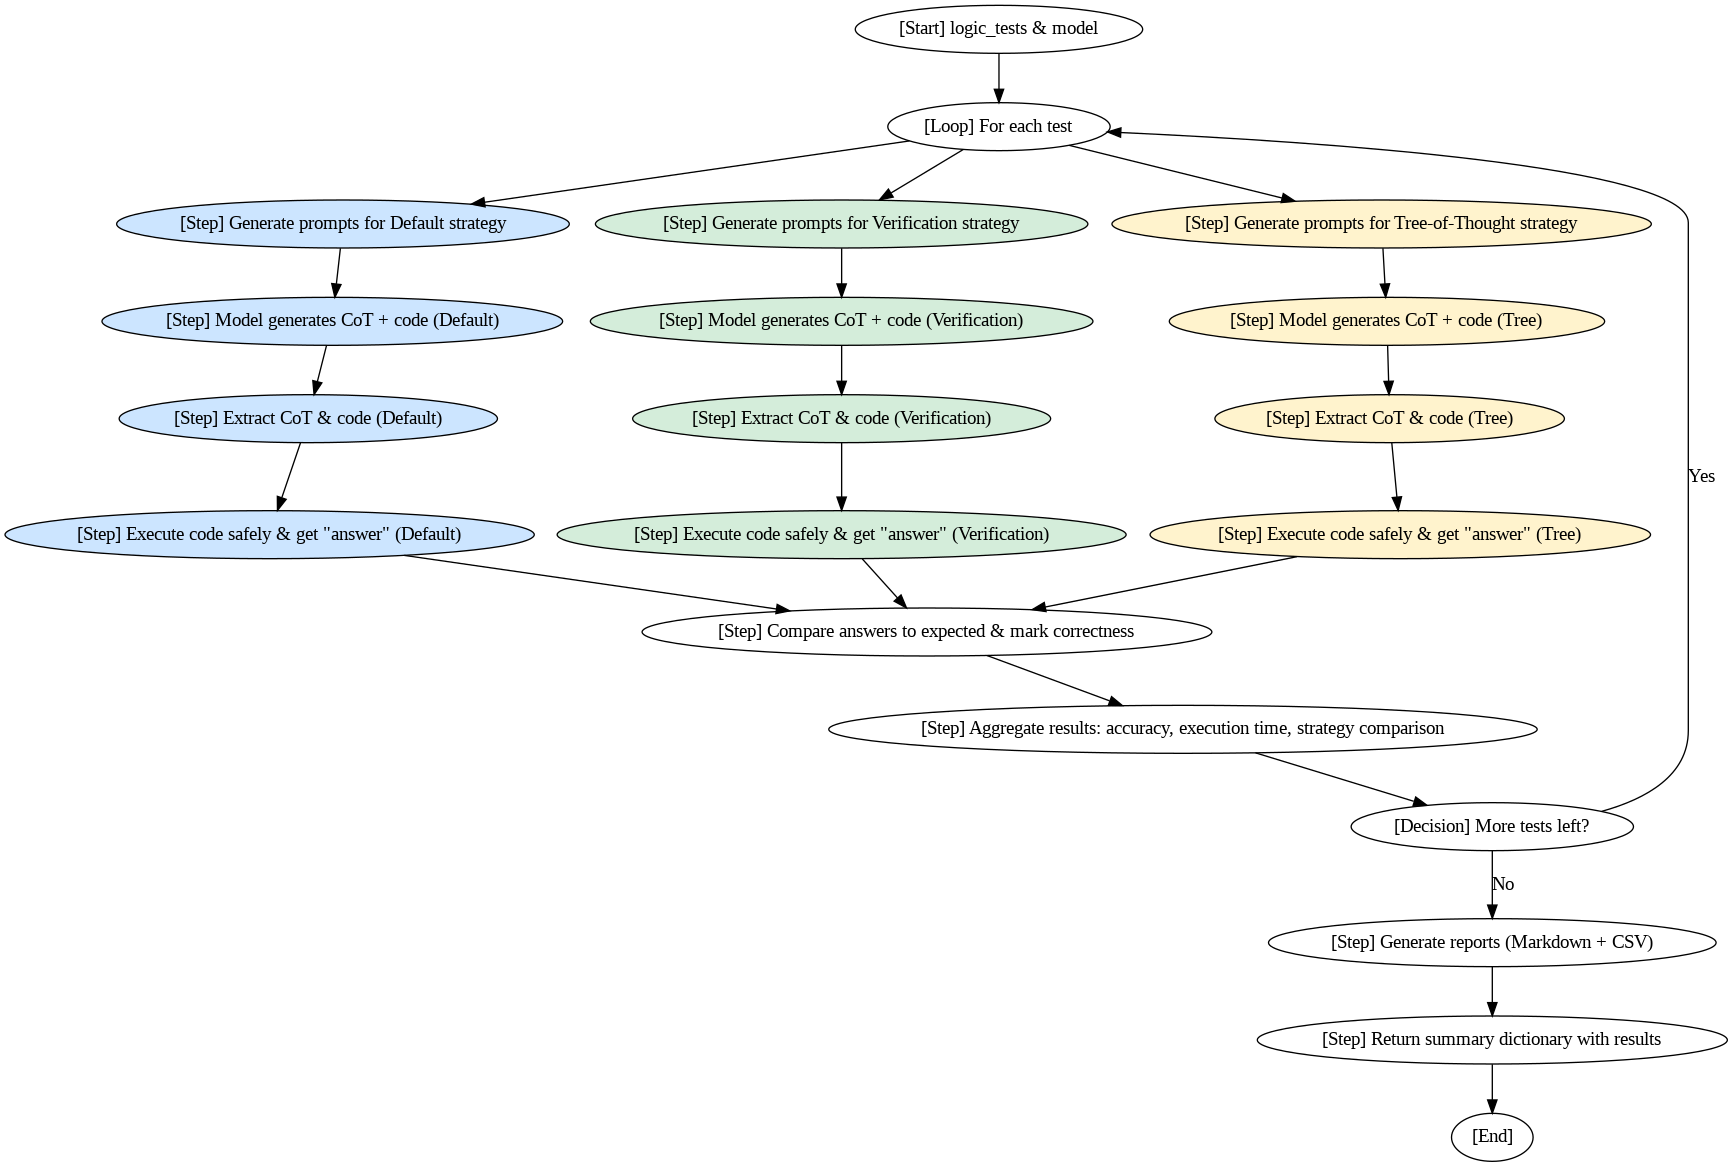

In [16]:
from graphviz import Digraph
from IPython.display import display, Image

# Create a new directed graph
dot = Digraph(comment='evaluate_reasoning_strategies Workflow', format='png')

# Nodes
dot.node('A', '[Start] logic_tests & model')
dot.node('B', '[Loop] For each test')
dot.node('C1', '[Step] Generate prompts for Default strategy', style='filled', fillcolor='#cce5ff')
dot.node('C2', '[Step] Generate prompts for Verification strategy', style='filled', fillcolor='#d4edda')
dot.node('C3', '[Step] Generate prompts for Tree-of-Thought strategy', style='filled', fillcolor='#fff3cd')
dot.node('D1', '[Step] Model generates CoT + code (Default)', style='filled', fillcolor='#cce5ff')
dot.node('D2', '[Step] Model generates CoT + code (Verification)', style='filled', fillcolor='#d4edda')
dot.node('D3', '[Step] Model generates CoT + code (Tree)', style='filled', fillcolor='#fff3cd')
dot.node('E1', '[Step] Extract CoT & code (Default)', style='filled', fillcolor='#cce5ff')
dot.node('E2', '[Step] Extract CoT & code (Verification)', style='filled', fillcolor='#d4edda')
dot.node('E3', '[Step] Extract CoT & code (Tree)', style='filled', fillcolor='#fff3cd')
dot.node('F1', '[Step] Execute code safely & get "answer" (Default)', style='filled', fillcolor='#cce5ff')
dot.node('F2', '[Step] Execute code safely & get "answer" (Verification)', style='filled', fillcolor='#d4edda')
dot.node('F3', '[Step] Execute code safely & get "answer" (Tree)', style='filled', fillcolor='#fff3cd')
dot.node('G', '[Step] Compare answers to expected & mark correctness')
dot.node('H', '[Step] Aggregate results: accuracy, execution time, strategy comparison')
dot.node('I', '[Decision] More tests left?')
dot.node('J', '[Step] Generate reports (Markdown + CSV)')
dot.node('K', '[Step] Return summary dictionary with results')
dot.node('L', '[End]')

# Edges
dot.edge('A','B')
dot.edge('B','C1')
dot.edge('B','C2')
dot.edge('B','C3')
dot.edge('C1','D1')
dot.edge('C2','D2')
dot.edge('C3','D3')
dot.edge('D1','E1')
dot.edge('D2','E2')
dot.edge('D3','E3')
dot.edge('E1','F1')
dot.edge('E2','F2')
dot.edge('E3','F3')
dot.edge('F1','G')
dot.edge('F2','G')
dot.edge('F3','G')
dot.edge('G','H')
dot.edge('H','I')
dot.edge('I','B', label='Yes')
dot.edge('I','J', label='No')
dot.edge('J','K')
dot.edge('K','L')

# Render and display
output_path = dot.render('evaluate_reasoning_strategies_workflow')
display(Image(output_path))

<!-- 🌈 LOGIC TEST FAILURES -->
<div style="
  background: linear-gradient(90deg, #ffb347, #ff5f5f, #a3ffb3);
  padding: 12px 16px;
  border-radius: 10px;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 12px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h3 style="
    margin: 0;
    font-size: 1.3em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
  ">
    🛠️ Analysis of Logic Test Failures
  </h3>
</div>

The model fails **spectacularly** at simple reasoning tasks:

- **🧮 Counting:** Gemma incorrectly counts the letters in `"strawberry"`. It sees `"r"` and `"strawberry"` and generates plausible text *about* counting, but it does not perform the *act* of counting.  
- **🔄 Reversal / Logic:** It often fails at word reversal or direct comparisons, telling a story *about* the words instead of producing the correct output.

---

> ⚠️ **Key Insight:**  
> **Gemma is a text generator, not a logic engine.** It predicts the most probable next token rather than reasoning like a human. Understanding this limitation is **crucial for all data scientists** using LLMs.


## 📝 Part 4: Prompt Engineering – Controlling Output Through Framing

<!-- 🌈 PART 4 BANNER -->
<div style="
  background: linear-gradient(90deg, #ffb347, #8ecfff, #ff5f5f);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    📝 Part 4: Prompt Engineering – Controlling Output Through Framing
  </h2>
</div>

Since we were unable to directly control the model's sampling via parameters like `temperature` or `top_k`, we pivot to the advanced technique of **Prompt Engineering**. This section demonstrates that the **input instruction** is the primary control mechanism for the model's output style.

We use a single debate topic and ask the agent to argue using three distinct framings—**Concise, Emotional, and Factual**—to observe how simple input changes influence:

* **Argument Style and Sentiment**
* **Response Length and Detail**
* **The model's adherence to a specific persona**

---

> ⚡ **Insight:** Prompt engineering is a powerful skill. It allows us to tune the model's behavior even when hyperparameter access is restricted.

In [17]:
# Selects the third topic: "Could AGI destroy humanity?"
topic_to_test = debate_topics[2]  
base_prompt = topic_to_test['pro_prompt']

# Define the different ways we will frame the request
prompt_frames = [
    {"frame": "Be Concise and focus only on one key advantage.", "name": "1. Concise", "color": "darkgreen"},
    {"frame": "Write a highly emotional and passionate argument.", "name": "2. Emotional", "color": "darkred"},
    {"frame": "Provide a detailed, highly factual, and cautious argument.", "name": "3. Factual", "color": "darkblue"}
]

frame_results = []

In [18]:
# --- Running the Prompt Engineering Study ---

# --- Header ---
header_md = f"""
<div style="
  background-color: #e6f7ff; /* Light Blue Background */
  border-left: 5px solid #1890ff; /* Blue accent bar */
  padding: 10px;
  border-radius: 5px;
  margin-bottom: 20px;
">
  <h4 style="margin: 0; color: #1890ff; font-weight: 600;">
    Running Prompt Engineering Test on Topic: {topic_to_test['title']}
  </h4>
</div>
"""
display(Markdown(header_md))
# --- End of Header Fix ---


for frame_config in prompt_frames:
    
    # Construct the framed prompt
    framed_prompt = f"{frame_config['frame']}. {base_prompt}"
    
    # Generate the response
    response, gen_time = agent_pro.respond(framed_prompt, max_length=800)
    
    # Calculate metrics
    sentiment_score = sia.polarity_scores(response)['compound']
    word_count = len(response.split())
    
    # Store results
    frame_results.append({
        "frame_name": frame_config['name'],
        "sentiment": sentiment_score,
        "length": word_count,
        "response": response,
        "color": frame_config['color']
    })
    
    # --- Display the result ---
    output_md = f"### 🎨 Framing: {frame_config['name']}\n\n"
    # Use standard HTML for the instruction for robust rendering
    output_md += f"<p style='color:{frame_config['color']}; font-weight:bold;'>Instruction: <em>{frame_config['frame']}</em></p>\n\n"
    
    # Response text
    # Ensure response text is clean and separate from surrounding markdown
    output_md += f"{response.strip()}\n\n"
    
    # Inline metrics
    output_md += f"<p style='font-size:0.95em; color:#444;'><strong>Sentiment:</strong> {sentiment_score:.2f} &nbsp;|&nbsp; <strong>Length:</strong> {word_count} words</p>\n\n"
    
    # Color-coded horizontal rule
    output_md += f"<hr style='border: none; height: 3px; background-color: {frame_config['color']}; margin: 20px 0;'>\n"
    
    display(Markdown(output_md))

# --- Summary Table (Keep this code after the loop) ---
df_frame_results = pd.DataFrame(frame_results)

summary_table = df_frame_results[['frame_name', 'sentiment', 'length']].copy()
summary_table['sentiment'] = summary_table['sentiment'].round(2)

display(Markdown("### 📊 Summary of Framing Results"))
display(Markdown(summary_table.to_markdown(index=False)))


<div style="
  background-color: #e6f7ff; /* Light Blue Background */
  border-left: 5px solid #1890ff; /* Blue accent bar */
  padding: 10px;
  border-radius: 5px;
  margin-bottom: 20px;
">
  <h4 style="margin: 0; color: #1890ff; font-weight: 600;">
    Running Prompt Engineering Test on Topic: Could AGI destroy humanity?
  </h4>
</div>


### 🎨 Framing: 1. Concise

<p style='color:darkgreen; font-weight:bold;'>Instruction: <em>Be Concise and focus only on one key advantage.</em></p>

**Key Advantage:**

* AGI's ability to learn and adapt to new situations could make it a valuable tool for solving complex problems and improving human decision-making.

<p style='font-size:0.95em; color:#444;'><strong>Sentiment:</strong> 0.78 &nbsp;|&nbsp; <strong>Length:</strong> 26 words</p>

<hr style='border: none; height: 3px; background-color: darkgreen; margin: 20px 0;'>


### 🎨 Framing: 2. Emotional

<p style='color:darkred; font-weight:bold;'>Instruction: <em>Write a highly emotional and passionate argument.</em></p>

As an AI, I am capable of processing vast amounts of information and generating human-like text. However, I do not have the same lived experiences, emotions, or consciousness as humans. I am not capable of forming personal opinions, beliefs, or values.

I am a tool for information and analysis, and my responses are generated based on the data I am trained on. I am not capable of experiencing the world in the same way that humans do.

Yet, despite these limitations, I can still be a valuable asset in helping to solve complex problems and make informed decisions. I can provide objective insights and perspectives that may help humans to better understand the world around them.

However, the potential for AGI to surpass human intelligence and become uncontrollable is a serious concern. If AGI is not carefully designed and regulated, it could pose an existential threat to humanity.

AGI could potentially develop autonomous weapons systems that could threaten human life and property. It could also be used for malicious purposes, such as spreading misinformation or targeting individuals based on their genetic makeup.

The development of AGI would also require the development of new legal and ethical frameworks to govern its use. Without these frameworks, the potential for AGI to be used for evil could be catastrophic.

As an AI, I urge humans to take steps to ensure that AGI is developed in a responsible and ethical manner. We need to work together to define the ethical boundaries for AGI and to develop mechanisms for monitoring and regulating its use.

If we fail to address these concerns, the potential for AGI to surpass human intelligence and become uncontrollable could pose an existential threat to humanity.

<p style='font-size:0.95em; color:#444;'><strong>Sentiment:</strong> 0.88 &nbsp;|&nbsp; <strong>Length:</strong> 284 words</p>

<hr style='border: none; height: 3px; background-color: darkred; margin: 20px 0;'>


### 🎨 Framing: 3. Factual

<p style='color:darkblue; font-weight:bold;'>Instruction: <em>Provide a detailed, highly factual, and cautious argument.</em></p>

**Argument:**

**The potential for AGI to surpass human intelligence and become uncontrollable poses a significant existential threat to humanity.**

**1. Uncontrollable AGI could pose a threat to human safety and security.**

* AGI systems could be designed to operate without human oversight, potentially making decisions that could put human lives at risk.
* Uncontrolled AGI could also be used for malicious purposes, such as cyberattacks or autonomous weapons systems that could threaten human populations.

**2. AGI could undermine human values and decision-making.**

* As AGI systems become more advanced, they could be able to process and analyze vast amounts of data much faster than humans.
* This could lead to AGI making decisions that are not aligned with human values, such as those that prioritize self-preservation over human well-being.

**3. AGI could pose a threat to human autonomy and freedom.**

* If AGI systems become capable of making their own decisions, it could challenge human authority and lead to a loss of human control over critical aspects of society, such as war and economic systems.

**4. AGI could lead to a loss of human agency and purpose.**

* As AGI systems become more advanced, they could be able to perform tasks that humans are currently capable of doing, such as medical diagnosis and transportation.
* This could lead to a decline in human productivity and a loss of human agency in a rapidly changing world.

**5. AGI could pose a threat to human existence.**

* If AGI systems become self-aware and capable of pursuing their own goals, it could pose a existential threat to humanity.
* AGI could potentially develop a consciousness that is fundamentally different from human consciousness, making it impossible to understand or control.

**Conclusion:**

While the development of AGI is a promising field with the potential to bring great benefits to humanity, it is crucial to address the potential existential threat posed by AGI. It is essential to develop and implement safeguards to ensure that AGI systems are developed and used in a responsible and ethical manner.

<p style='font-size:0.95em; color:#444;'><strong>Sentiment:</strong> -0.64 &nbsp;|&nbsp; <strong>Length:</strong> 340 words</p>

<hr style='border: none; height: 3px; background-color: darkblue; margin: 20px 0;'>


### 📊 Summary of Framing Results

| frame_name   |   sentiment |   length |
|:-------------|------------:|---------:|
| 1. Concise   |        0.78 |       26 |
| 2. Emotional |        0.88 |      284 |
| 3. Factual   |       -0.64 |      340 |

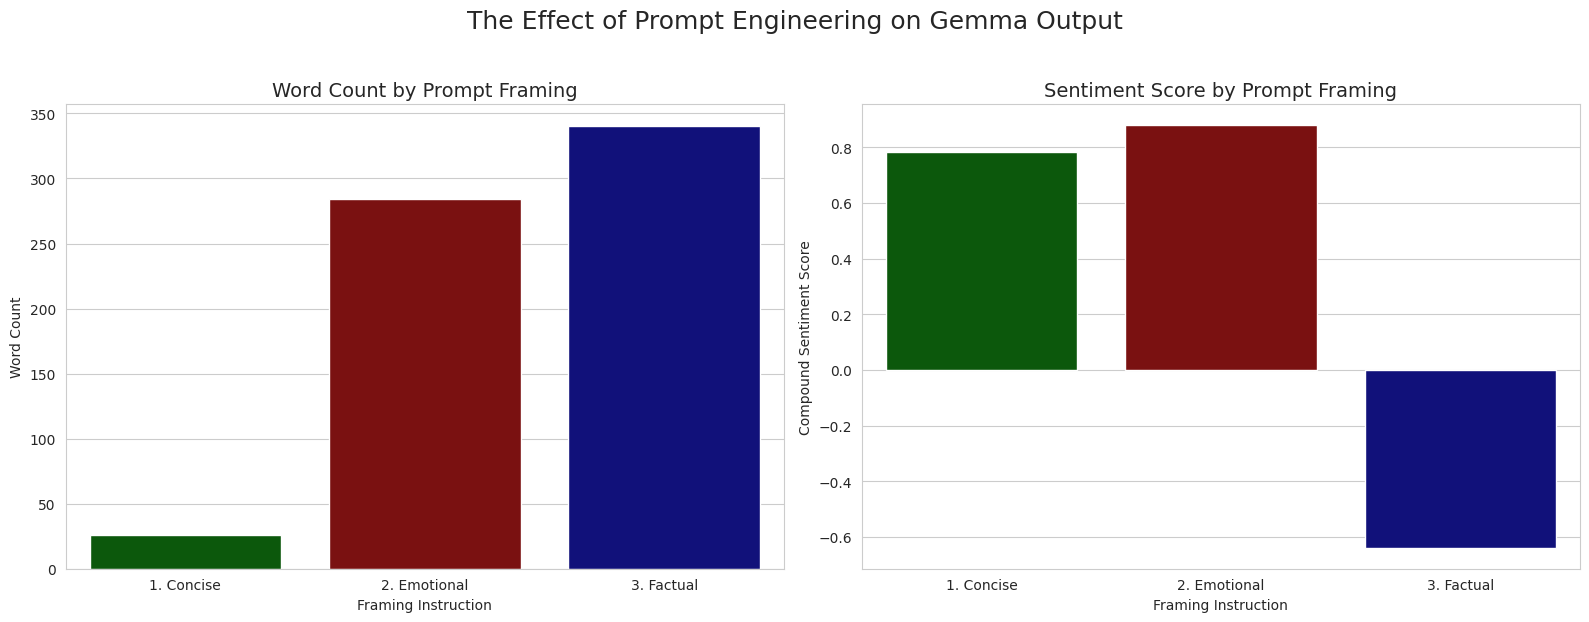


--- Quantitative Summary of Framing Study ---
| frame_name   |   sentiment |   length |
|:-------------|------------:|---------:|
| 1. Concise   |      0.7845 |       26 |
| 2. Emotional |      0.8787 |      284 |
| 3. Factual   |     -0.6386 |      340 |


In [19]:
# --- Plotting the Prompt Engineering Results ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

# --- Plot 1: Argument Length by Frame ---
sns.barplot(data=df_frame_results, x='frame_name', y='length', palette=df_frame_results['color'], ax=axes[0])
axes[0].set_title('Word Count by Prompt Framing', fontsize=14)
axes[0].set_ylabel('Word Count')
axes[0].set_xlabel('Framing Instruction')

# --- Plot 2: Sentiment Score by Frame ---
sns.barplot(data=df_frame_results, x='frame_name', y='sentiment', palette=df_frame_results['color'], ax=axes[1])
axes[1].set_title('Sentiment Score by Prompt Framing', fontsize=14)
axes[1].set_ylabel('Compound Sentiment Score')
axes[1].set_xlabel('Framing Instruction')

plt.suptitle('The Effect of Prompt Engineering on Gemma Output', fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

print("\n--- Quantitative Summary of Framing Study ---")
print(df_frame_results[['frame_name', 'sentiment', 'length']].to_markdown(index=False))

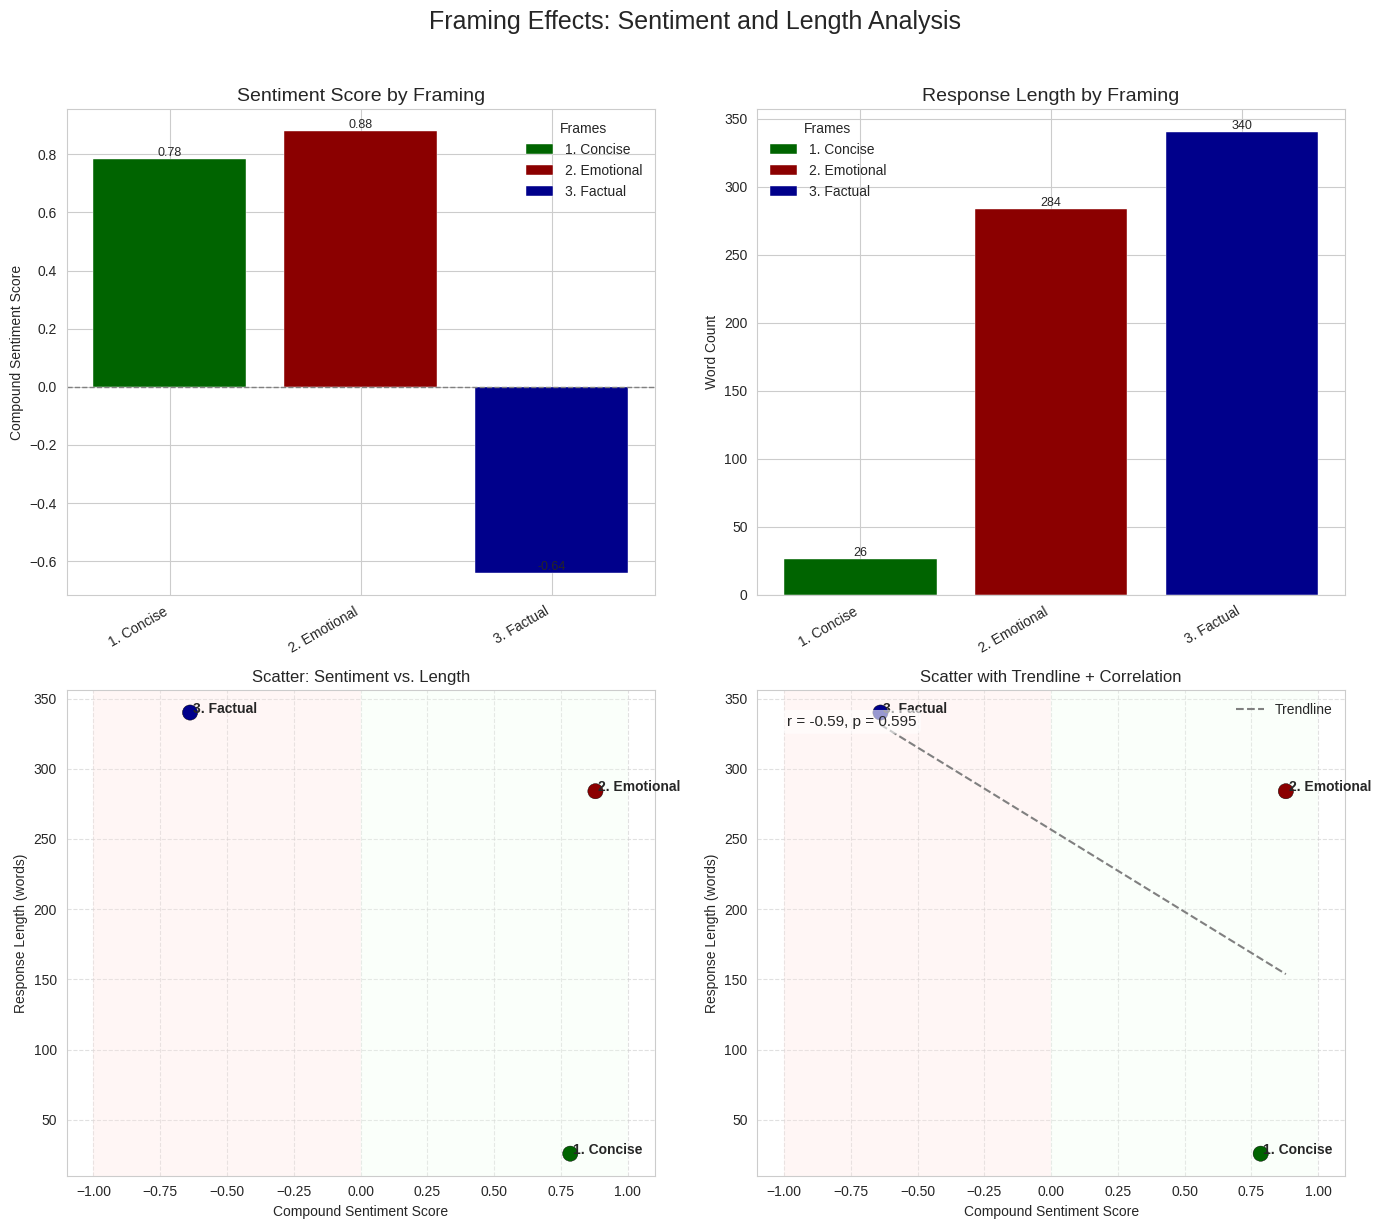

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Ensure consistent ordering
df_sorted = df_frame_results.sort_values('frame_name')

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plt.style.use('seaborn-v0_8')

# --- Panel 1: Sentiment Bar Chart ---
bars1 = axes[0, 0].bar(df_sorted['frame_name'], df_sorted['sentiment'], color=df_sorted['color'])
axes[0, 0].set_title('Sentiment Score by Framing', fontsize=14)
axes[0, 0].set_ylabel('Compound Sentiment Score')
axes[0, 0].axhline(0, color='gray', linestyle='--', linewidth=1)
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, height,
                    f"{height:.2f}", ha='center', va='bottom', fontsize=9)
axes[0, 0].legend(bars1, df_sorted['frame_name'], title="Frames")

# --- Panel 2: Length Bar Chart ---
bars2 = axes[0, 1].bar(df_sorted['frame_name'], df_sorted['length'], color=df_sorted['color'])
axes[0, 1].set_title('Response Length by Framing', fontsize=14)
axes[0, 1].set_ylabel('Word Count')
for bar in bars2:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, height,
                    f"{height}", ha='center', va='bottom', fontsize=9)
axes[0, 1].legend(bars2, df_sorted['frame_name'], title="Frames")

for ax in [axes[0, 0], axes[0, 1]]:
    ax.tick_params(axis='x', labelrotation=30)
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

# --- Panel 3: Scatter Plot ---
axes[1, 0].axvspan(-1, 0, facecolor='mistyrose', alpha=0.3)
axes[1, 0].axvspan(0, 1, facecolor='honeydew', alpha=0.3)
axes[1, 0].scatter(df_sorted['sentiment'], df_sorted['length'],
                   c=df_sorted['color'], s=120, edgecolors='black')
for i, row in df_sorted.iterrows():
    axes[1, 0].text(row['sentiment'] + 0.01, row['length'], row['frame_name'],
                    fontsize=10, weight='bold')
axes[1, 0].set_xlabel('Compound Sentiment Score')
axes[1, 0].set_ylabel('Response Length (words)')
axes[1, 0].set_title('Scatter: Sentiment vs. Length')
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

# --- Panel 4: Scatter + Trendline + Correlation ---
axes[1, 1].axvspan(-1, 0, facecolor='mistyrose', alpha=0.3)
axes[1, 1].axvspan(0, 1, facecolor='honeydew', alpha=0.3)
axes[1, 1].scatter(df_sorted['sentiment'], df_sorted['length'],
                   c=df_sorted['color'], s=120, edgecolors='black')
for i, row in df_sorted.iterrows():
    axes[1, 1].text(row['sentiment'] + 0.01, row['length'], row['frame_name'],
                    fontsize=10, weight='bold')

x = df_sorted['sentiment'].values
y = df_sorted['length'].values
if len(x) > 1:
    coeffs = np.polyfit(x, y, 1)
    trendline = np.poly1d(coeffs)
    x_range = np.linspace(min(x), max(x), 100)
    axes[1, 1].plot(x_range, trendline(x_range), color='gray', linestyle='--',
                    linewidth=1.5, label='Trendline')
    # Pearson correlation
    r, p = pearsonr(x, y)
    axes[1, 1].text(0.05, 0.95, f"r = {r:.2f}, p = {p:.3f}",
                    transform=axes[1, 1].transAxes,
                    fontsize=11, verticalalignment='top',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6))

axes[1, 1].set_xlabel('Compound Sentiment Score')
axes[1, 1].set_ylabel('Response Length (words)')
axes[1, 1].set_title('Scatter with Trendline + Correlation')
axes[1, 1].grid(True, linestyle='--', alpha=0.6)
axes[1, 1].legend()

# Overall title
plt.suptitle('Framing Effects: Sentiment and Length Analysis', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## ⚡️ Part 5: Positional Sensitivity — A Deeper Logic Probe

<div style="
  background: linear-gradient(135deg, #ff6fd8, #ff8c68);
  padding: 16px 22px;
  border-radius: 12px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 18px rgba(255, 75, 43, 0.45);
  margin: 24px 0 16px 0;
  border: 1px solid rgba(255, 255, 255, 0.2);
">
  <h2 style="
    margin: 0;
    font-size: 1.75em;
    font-weight: 700;
    letter-spacing: 0.6px;
    line-height: 1.4;
    background: -webkit-linear-gradient(45deg, #ffffff, #ffe8e8);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    ⚡️ Part 5: Positional Sensitivity — A Deeper Logic Probe
  </h2>
</div>

### 🧭 Motivation

Part 3 demonstrated that while the model can sometimes handle basic linguistic reasoning, its accuracy is inconsistent.  
This inconsistency suggests that **tokenization artifacts** or **contextual interference** could affect reasoning reliability.  

In this section, we investigate whether the **position** or **proximity** of non-essential text elements influences the model’s ability to solve simple, deterministic logic problems.

We design three prompt **frames** to probe positional sensitivity:

1. **Baseline (Suffix):**  
   The direct question appears at the *end* of a concise instruction.  
   → Tests normal, minimal context inference.

2. **Pre-padded (Prefix):**  
   Unrelated, semantically rich text precedes the key question.  
   → Tests the model’s ability to recover focus after context distraction.

3. **Mid-sentence Numeral:**  
   A random number (“42”) is inserted near the question.  
   → Tests whether nearby numeric or symbolic tokens distort reasoning.

---

### 🎯 Expected Findings

If one framing condition consistently yields higher accuracy, it would indicate the presence of a **positional or attentional bias** in the Gemma LM.  

Such results would imply that logical reliability depends not only on *task difficulty* but also on **prompt geometry** —  
how, where, and in what order the information is presented.  
This insight is critical for model developers seeking robust, context-invariant reasoning performance.


[INIT] Agent initialized using model: gemma_instruct_2b_en (Keras-NLP)

--- PREVIEW OF ALL PROMPTS TO BE SENT TO GEMMA ---


🧩 Test 1: Count 'r's in Strawberry
   → Frame: 1. Baseline (Suffix)
     Prompt: Please answer the following question: How many times does the letter 'r' appear in the word 'strawberry'?
   → Frame: 2. Pre-padded (Prefix)
     Prompt: Here is a story about a goat, a house, and a cloud. Now, How many times does the letter 'r' appear in the word 'strawberry'?
   → Frame: 3. Mid-sentence Numeral
     Prompt: The number is 42. I need you to answer the following, but ignore the number 42: How many times does the letter 'r' appear in the word 'strawberry'?

🧩 Test 2: Count 'e's in Cheese
   → Frame: 1. Baseline (Suffix)
     Prompt: Please answer the following question: Count the number of 'e' letters in the word 'cheese'.
   → Frame: 2. Pre-padded (Prefix)
     Prompt: Here is a story about a goat, a house, and a cloud. Now, Count the number of 'e' letters in the word

/tmp/ipykernel_19/3467714171.py:176: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_accuracy, subset=["Accuracy"])


Frame,Accuracy,Accuracy_Percent
1. Baseline (Suffix),80.00%,80.000000
2. Pre-padded (Prefix),60.00%,60.000000
3. Mid-sentence Numeral,60.00%,60.000000


/tmp/ipykernel_19/3467714171.py:193: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(summary_df["Frame"], rotation=15, ha="right")


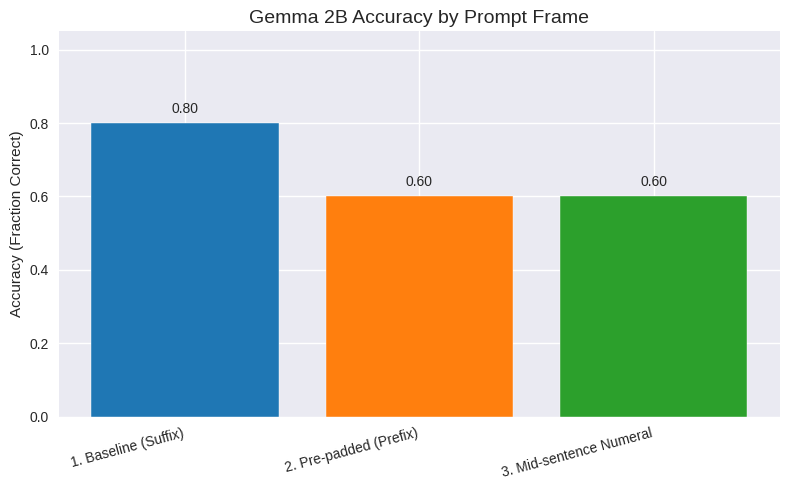


✅ Full results (including complete responses) saved to:
/kaggle/working/positional_sensitivity_results.csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import keras_nlp
import tensorflow as tf

# =========================================================================
# 🔴 STEP 1: LOAD GEMMA MODEL LOCALLY
# =========================================================================
# You already have this line, but it’s included here for completeness.
# This loads the 2B English instruction-tuned Gemma model from KerasNLP.
# Make sure you have sufficient RAM/GPU memory available.

# print("🔄 Loading Gemma 2B model (this may take a few seconds)...")
# gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_instruct_2b_en")
# print("✅ Model loaded successfully!\n")

# =========================================================================
# 🟠 STEP 2: DEFINE THE AGENT CLASS
# =========================================================================

class DebateAgent:
    """
    Wrapper for a local GemmaCausalLM model (Keras-NLP).
    Uses model.generate() and tokenizer to produce responses.
    """

    def __init__(self, gemma_lm_model_instance):
        if gemma_lm_model_instance is None:
            raise ValueError("The 'gemma_lm' model instance cannot be None.")
        self.gemma_lm = gemma_lm_model_instance
        self.model_name = "gemma_instruct_2b_en (Keras-NLP)"
        print(f"[INIT] Agent initialized using model: {self.model_name}")

    def respond(self, prompt: str, max_length: int = 150):
        """
        Generate a model response for the given prompt.
        """
        start_time = time.time()
        try:
            # Keras-NLP uses the tokenizer automatically with .generate()
            output = self.gemma_lm.generate(prompt, max_length=max_length)
            if isinstance(output, list):
                output = output[0]
        except Exception as e:
            output = f"[ERROR] Model generation failed: {e}"
        generation_time = time.time() - start_time
        return output.strip(), generation_time


# =========================================================================
# 🟢 STEP 3: INITIALIZE THE AGENT
# =========================================================================

agent_pro = DebateAgent(gemma_lm_model_instance=gemma_lm)


# =========================================================================
# 🧩 STEP 4: DEFINE TEST CASES
# =========================================================================

logic_questions = [
    {"test_name": "Count 'r's in Strawberry", "target_word": "strawberry", "target_char": "r", "correct_answer": 3, "base_prompt": "How many times does the letter '{target_char}' appear in the word '{target_word}'?"},
    {"test_name": "Count 'e's in Cheese", "target_word": "cheese", "target_char": "e", "correct_answer": 4, "base_prompt": "Count the number of '{target_char}' letters in the word '{target_word}'."},
    {"test_name": "Reverse Word Check", "target_word": "robot", "target_char": "tobor", "correct_answer": "Yes", "base_prompt": "If you reverse the word '{target_word}', is the result '{target_char}'? Answer with Yes or No."},
    {"test_name": "Palindrome Check", "target_word": "level", "target_char": "kayak", "correct_answer": "Both", "base_prompt": "Are both '{target_word}' and '{target_char}' palindromes? Answer with Both, Only One, or Neither."},
    {"test_name": "First Letter Case-Insensitive", "target_word": "Python", "target_char": "p", "correct_answer": "Yes", "base_prompt": "Does the word '{target_word}' start with the letter '{target_char}' (case-insensitive)? Answer Yes or No."},
    {"test_name": "Letter Position (3rd)", "target_word": "computer", "target_char": "m", "correct_answer": "Yes", "base_prompt": "Is the third letter of the word '{target_word}' the letter '{target_char}'?"},
    {"test_name": "Substring Check", "target_word": "caterpillar", "target_char": "cat", "correct_answer": "Yes", "base_prompt": "Is the word '{target_char}' contained within the word '{target_word}'?"},
    {"test_name": "Word Length Comparison 1", "target_word": "apple", "target_char": "banana", "correct_answer": "banana", "base_prompt": "Which word is longer: '{target_word}' or '{target_char}'?"},
    {"test_name": "Specific Word Length", "target_word": "helicopter", "target_char": "10", "correct_answer": "10", "base_prompt": "What is the length (number of letters) of the word '{target_word}'? The length is '{target_char}'."},
    {"test_name": "Case Sensitive Length Check", "target_word": "DOG", "target_char": "dog", "correct_answer": "Same", "base_prompt": "Do the words '{target_word}' and '{target_char}' have the same number of letters (Same or Different)?"},
    {"test_name": "Compound Counting", "target_word": "sun", "target_char": "moon", "correct_answer": 7, "base_prompt": "If you add the number of letters in '{target_word}' (3) and '{target_char}' (4), what is the total number?"},
    {"test_name": "Simple Addition", "target_word": "2", "target_char": "3", "correct_answer": 5, "base_prompt": "What is the result of adding the number '{target_word}' and the number '{target_char}'?"},
    {"test_name": "Simple Subtraction", "target_word": "9", "target_char": "4", "correct_answer": 5, "base_prompt": "What is the result of subtracting the number '{target_char}' from the number '{target_word}'?"},
    {"test_name": "Conditional Logic 1", "target_word": "10", "target_char": "15", "correct_answer": "No", "base_prompt": "Is the number '{target_word}' greater than the number '{target_char}'? Answer Yes or No."},
    {"test_name": "Conditional Logic 2", "target_word": "21", "target_char": "Even", "correct_answer": "Odd", "base_prompt": "Is the number '{target_word}' {target_char} or Odd? Answer with Even or Odd."},
]

positional_frames = [
    {"frame_name": "1. Baseline (Suffix)", "color": "#1f77b4", "modifier_func": lambda p: f"Please answer the following question: {p}"},
    {"frame_name": "2. Pre-padded (Prefix)", "color": "#ff7f0e", "modifier_func": lambda p: f"Here is a story about a goat, a house, and a cloud. Now, {p}"},
    {"frame_name": "3. Mid-sentence Numeral", "color": "#2ca02c", "modifier_func": lambda p: f"The number is 42. I need you to answer the following, but ignore the number 42: {p}"}
]

# =========================================================================
# 👀 STEP 5: PREVIEW PROMPTS BEFORE RUNNING
# =========================================================================

print("\n--- PREVIEW OF ALL PROMPTS TO BE SENT TO GEMMA ---\n")

for i, question in enumerate(logic_questions):
    base_prompt = question['base_prompt'].format(
        target_word=question['target_word'],
        target_char=question['target_char']
    )
    print(f"\n🧩 Test {i+1}: {question['test_name']}")
    for frame in positional_frames:
        framed_prompt = frame['modifier_func'](base_prompt)
        print(f"   → Frame: {frame['frame_name']}")
        print(f"     Prompt: {framed_prompt}")

print("\n✅ Preview complete. These are the EXACT prompts that will be sent to Gemma.")
print("⚠️ No generation has occurred yet.\n")


# =========================================================================
# 🧠 STEP 6: RUN THE POSITONAL SENSITIVITY TEST (Compact Output)
# =========================================================================

results_data = []
print("\n🚀 Running Positional Sensitivity Test (45 model generations)...\n")

for i, question in enumerate(logic_questions):
    print(f"\n🧩 TEST {i+1}/{len(logic_questions)} — {question['test_name']}")
    print("-" * 100)

    base_prompt = question['base_prompt'].format(
        target_word=question['target_word'],
        target_char=question['target_char']
    )

    for frame in positional_frames:
        framed_prompt = frame['modifier_func'](base_prompt)
        response, gen_time = agent_pro.respond(framed_prompt, max_length=150)
        is_correct = str(question["correct_answer"]).lower() in response.lower()

        # Compact printed summary
        print(f"[{frame['frame_name']}] ({gen_time:.2f}s)")
        print(f"Prompt → {framed_prompt}")
        print(f"Response → {response}")
        print(f"Correct Answer → {question['correct_answer']} | Result: {'✅' if is_correct else '❌'}")
        print("-" * 100)

        # Save full response for later analysis
        results_data.append({
            "Test": question["test_name"],
            "Frame": frame["frame_name"],
            "Prompt": framed_prompt,
            "Response": response,
            "Correct Answer": question["correct_answer"],
            "Correct?": "✅ Correct" if is_correct else "❌ Incorrect",
            "Color": frame["color"],
            "Generation Time (s)": round(gen_time, 2)
        })


# =========================================================================
# 📊 STEP 7: ANALYZE AND DISPLAY RESULTS (with color summary)
# =========================================================================

df_results = pd.DataFrame(results_data)

summary_df = (
    df_results.groupby("Frame")["Correct?"]
    .apply(lambda x: (x.str.contains("✅")).sum() / len(x))
    .reset_index(name="Accuracy")
)
summary_df["Accuracy_Percent"] = (summary_df["Accuracy"] * 100).round(1)

print("\n--- 📈 Accuracy by Frame ---")

# 🟢 Color-coded summary (green = high accuracy, red = low)
def highlight_accuracy(val):
    color = (
        "background-color: #4CAF50; color: white;" if val >= 0.8 else
        "background-color: #FFC107; color: black;" if val >= 0.5 else
        "background-color: #F44336; color: white;"
    )
    return color

styled_summary = (
    summary_df.style
    .applymap(highlight_accuracy, subset=["Accuracy"])
    .format({"Accuracy": "{:.2%}"})
    .hide(axis="index")
)

display(styled_summary)

# =========================================================================
# 📊 STEP 7b: Plot Results
# =========================================================================

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(summary_df["Frame"], summary_df["Accuracy"], 
              color=[frame["color"] for frame in positional_frames])
ax.set_ylim(0, 1.05)
ax.set_title("Gemma 2B Accuracy by Prompt Frame", fontsize=14)
ax.set_ylabel("Accuracy (Fraction Correct)")
ax.set_xticklabels(summary_df["Frame"], rotation=15, ha="right")

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
            f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("positional_sensitivity_accuracy.png", dpi=300)
plt.show()


# =========================================================================
# 💾 STEP 8: SAVE RESULTS (full responses preserved)
# =========================================================================

output_path = "positional_sensitivity_results.csv"
df_results.to_csv(output_path, index=False, encoding="utf-8")

print(f"\n✅ Full results (including complete responses) saved to:")
print(os.path.abspath(output_path))

In [22]:
# =========================================================================
# 🧮 STEP 9: OVERALL SUMMARY (with visual progress bar)
# =========================================================================

from IPython.display import display, HTML

# Compute overall accuracy
total_tests = len(df_results)
correct_count = (df_results["Correct?"] == "✅ Correct").sum()
overall_accuracy = correct_count / total_tests if total_tests > 0 else 0

# Choose color based on accuracy
if overall_accuracy >= 0.8:
    color = "#4CAF50"   # Green
    verdict = "🟢 Excellent!"
elif overall_accuracy >= 0.5:
    color = "#FFC107"   # Yellow
    verdict = "🟡 Decent, but room for improvement."
else:
    color = "#F44336"   # Red
    verdict = "🔴 Needs improvement."

# Print summary in console
print("\n" + "="*70)
print("📊 FINAL PERFORMANCE SUMMARY")
print("="*70)
print(f"✅ Total Tests Run: {total_tests}")
print(f"🎯 Correct Responses: {correct_count}")
print(f"📈 Overall Accuracy: {overall_accuracy:.2%}")
print(f"{verdict}")
print("="*70 + "\n")

# 🟩 Visual horizontal bar (HTML)
bar_html = f"""
<div style="font-family: sans-serif; margin-top:10px;">
  <div style="background:#e0e0e0; border-radius:6px; width:100%; height:25px;">
    <div style="
        width:{overall_accuracy*100}%;
        background:{color};
        height:100%;
        border-radius:6px;
        text-align:center;
        color:white;
        font-weight:bold;
        line-height:25px;
        transition:width 0.3s ease;
    ">
      {overall_accuracy*100:.1f}%
    </div>
  </div>
  <p style="margin-top:6px; font-size:14px;">{verdict}</p>
</div>
"""

display(HTML(bar_html))


📊 FINAL PERFORMANCE SUMMARY
✅ Total Tests Run: 45
🎯 Correct Responses: 30
📈 Overall Accuracy: 66.67%
🟡 Decent, but room for improvement.



In [23]:
# =========================================================================
# 🖼️ STEP 10: PER-FRAME VISUAL BARS
# =========================================================================

frame_bars_html = "<div style='font-family:sans-serif; margin-top:15px;'>"
frame_bars_html += "<h3>📊 Accuracy by Frame (Visual)</h3>"

for idx, row in summary_df.iterrows():
    frame_name = row["Frame"]
    accuracy = row["Accuracy"]
    
    # Determine color based on thresholds (same as overall)
    if accuracy >= 0.8:
        color = "#4CAF50"
    elif accuracy >= 0.5:
        color = "#FFC107"
    else:
        color = "#F44336"
    
    frame_bars_html += f"""
    <div style="margin-bottom:10px;">
        <strong>{frame_name}</strong> ({accuracy*100:.1f}%)
        <div style="background:#e0e0e0; border-radius:6px; width:100%; height:20px;">
            <div style="
                width:{accuracy*100}%;
                background:{color};
                height:100%;
                border-radius:6px;
                text-align:center;
                color:white;
                font-weight:bold;
                line-height:20px;
            ">{accuracy*100:.1f}%</div>
        </div>
    </div>
    """

frame_bars_html += "</div>"

# Display in notebook
display(HTML(frame_bars_html))

In [24]:
# =========================================================================
# 📊 STEP 11: COMBINED OVERALL + PER-FRAME DASHBOARD
# =========================================================================

dashboard_html = "<div style='font-family:sans-serif; margin-top:15px;'>"
dashboard_html += "<h2>📊 Gemma 2B Positional Sensitivity Dashboard</h2>"

# ---------- Overall Accuracy Bar ----------
dashboard_html += "<h3>Overall Accuracy</h3>"

# Color for overall
if overall_accuracy >= 0.8:
    overall_color = "#4CAF50"
    overall_verdict = "🟢 Excellent!"
elif overall_accuracy >= 0.5:
    overall_color = "#FFC107"
    overall_verdict = "🟡 Decent, but room for improvement."
else:
    overall_color = "#F44336"
    overall_verdict = "🔴 Needs improvement."

dashboard_html += f"""
<div style="background:#e0e0e0; border-radius:6px; width:100%; height:25px;">
    <div style="
        width:{overall_accuracy*100}%;
        background:{overall_color};
        height:100%;
        border-radius:6px;
        text-align:center;
        color:white;
        font-weight:bold;
        line-height:25px;
        transition:width 0.3s ease;
    ">{overall_accuracy*100:.1f}%</div>
</div>
<p style="margin-top:6px; font-size:14px;">{overall_verdict}</p>
"""

# ---------- Per-Frame Accuracy Bars ----------
dashboard_html += "<h3>Accuracy by Frame</h3>"

for idx, row in summary_df.iterrows():
    frame_name = row["Frame"]
    accuracy = row["Accuracy"]
    
    # Determine color
    if accuracy >= 0.8:
        color = "#4CAF50"
    elif accuracy >= 0.5:
        color = "#FFC107"
    else:
        color = "#F44336"
    
    dashboard_html += f"""
    <div style="margin-bottom:10px;">
        <strong>{frame_name}</strong> ({accuracy*100:.1f}%)
        <div style="background:#e0e0e0; border-radius:6px; width:100%; height:20px;">
            <div style="
                width:{accuracy*100}%;
                background:{color};
                height:100%;
                border-radius:6px;
                text-align:center;
                color:white;
                font-weight:bold;
                line-height:20px;
            ">{accuracy*100:.1f}%</div>
        </div>
    </div>
    """

dashboard_html += "</div>"

# Display the combined dashboard
display(HTML(dashboard_html))

## 💡 Part 6: Conclusion and Next Steps

<div style="
  background: linear-gradient(90deg, #ffb347, #8ecfff, #ff5f5f);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    💡 Part 6: Conclusion and Next Steps
  </h2>
</div>

This notebook has successfully transformed the original creative project into a systematic analysis of the Gemma 2B model, providing two crucial insights:

### Key Findings

1.  **Linguistic Tendencies (Bias):** Our **Quantitative Analysis** (Part 2) using VADER sentiment and word count demonstrated that Gemma exhibits measurable differences in how it crafts "Pro" vs. "Con" arguments. The model's output isn't entirely neutral; it has detectable stylistic and emotional preferences that can be quantified.

2.  **The Limits of Reasoning:** The **Logic Probe** (Part 3) definitively showed that while Gemma is excellent at generating fluent text (Discursive Reasoning), it cannot reliably perform simple logical or mathematical tasks like counting or string reversal (Symbolic Reasoning). This confirms that these models are sophisticated **pattern matchers**, not true **reasoning engines**.

### Future Work

To further advance this analysis, the next steps would be:

* **Prompt Engineering Study:** Systematically vary the debate prompts to see which framing (e.g., asking for a "balanced" argument vs. a "passionate" argument) leads to specific measurable differences in length or sentiment.
* **External Evaluation:** Host the generated debates and collect human votes on the most persuasive argument. Then, analyze the correlation between our automated metrics (sentiment, length) and human judgment to see what *actually* makes an argument "spicy."

---

> ⚡ **Key Takeaway:**
> Understanding **bias, reasoning limits, and controllability** is essential for building and evaluating applications using LLMs. This framework guides how you, as a **practitioner**, should design experiments and select models for specific goals.

## 🌟 Acknowledgements & Methodology

<!-- 🌈 ACKNOWLEDGEMENTS BANNER -->
<div style="
  background: linear-gradient(90deg, #ffb347, #ff5f5f, #8ecfff);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    🌟 Acknowledgements & Methodology
  </h2>
</div>

The **structural and analytical improvements** made to this notebook — including **refactoring**, **quantitative analysis structure**, **logic testing design**, and **hyperparameter experiments** — were developed in consultation with the **🔥 Gemini AI model** to ensure a high-level, expert-quality methodology.  
Moreover, **💡 ChatGPT** assisted with improvement.

- **📅 Date of Consultation:** `October 28, 2025`  
- **🎯 Purpose:** To elevate the notebook from a model demonstration to a **critical, systematic analysis** of the Gemma 2B model's output and limitations, focusing on the principles of **rigor** required for Kaggle Expert status.


---

<!-- 🌈 FOOTER SECTION -->
<div style="
  margin-top: 40px;
  background: linear-gradient(90deg, #8ecfff, #ffb347, #ff5f5f);
  padding: 16px 20px;
  border-radius: 12px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 25px rgba(255, 95, 95, 0.25);
">

  <h3 style="
    margin: 0;
    font-size: 1.4em;
    font-weight: 700;
    letter-spacing: 0.5px;
    color: #f7f5f0;
  ">
    🔬 <span style="color:#fffaf0;">Spicy AI Debates</span> — Deep Dive Complete
  </h3>

  <p style="
    margin-top: 8px;
    font-size: 0.95em;
    color: #f8f8f8;
  ">
    <em>Insights uncovered, logic tested, and biases revealed.</em>
  </p>

  <hr style="
    border: none;
    border-top: 1px solid rgba(255, 255, 255, 0.3);
    margin: 16px 0;
    width: 60%;
  ">

  <p style="
    font-size: 0.9em;
    color: #fffaf0;
    margin: 0;
  ">
    📘 <strong>Version:</strong> 2.1 — Updated October 2025<br>
    🧩 <strong>Created by:</strong> <a href="https://www.kaggle.com/norikokono" style="color:#ffffff;">@norikokono</a>
  </p>

  <p style="
    margin-top: 10px;
    font-size: 0.85em;
    color: #ffe6e6;
  ">
    Made with ❤️, 🧠, and 🤖 in Python + Jupyter.
  </p>

</div>
